# Описание проекта
Сервис  “Мой Чемпион” помогает спортивным школам фигурного катания, тренерам мониторить результаты своих подопечных и планировать дальнейшее развитие спортсменов.
## Цель
Создать модель, помогающую находить элементы, которые могут быть успешно исполнены спортсменом на соревновании. 

Сервис будет прогнозировать прогресс и возможное выполнение тех или иных элементов программы по истории предыдущих выступлений и выполнения элементов на соревнованиях.

## Расшифровка элементов tournaments_scores.title
Разбираем только одиночное катание. Есть 3 типа элементов:
- Прыжки: начинаются с цифры от 1 до 4, потом идет код прыжка, потом может стоять один
из специальных кодов
- Вращения. Сначала идет код вращения, после которого стоит уровень (B – базовый, 1, 2, 3,4). Если после элемента стоит NV – not value значит элемент не выполнен.
- Шаги. Два варианта. Может быть так же как у вращений 5 уровней и NV – StSqB, StSq1 и
тд.
- Внимание:
    - Могут попадаться базовые уровни без литеры В, например ChSt или CCoSp
    - Иногда прыжки иногда указаны без цифры
    - Также могут встречаться отдельные элементы из других групп
- Ошибки:
    - q – недокрут прыжка в четверть оборота. Базовая стоимость при такой ошибке
    остается неизменной, но судьи обязательно снизят за это GOE
    - < – спортсмен провращался в воздухе на 90°-180 ° меньше, чем положено,
    "недокрутил". Стоимость прыжка за такую ошибку не сильно, но снижают.
    - << – спортсмен недокрутил более 180°. Стоимость прыжка становится, как если бы
    прыгнул на один оборот меньше
    - e – Этот знак ставится, когда фигурист отталкивается от льда с неправильного
    ребра. Правильные ребра: на лутце – наружное, на флипе – внутреннее. На
    базовую стоимость влияет ровно на то же количество баллов, что и <
    - ! – Этот знак так же ставится только у флипа и лутца в случае, если технический
    специалист посчитал, что отрыв происходит с "нечеткого ребра". На базовую
    стоимость прыжка эта ошибка не влияет, но судьи обязательно её учтут при
    выставлении GOE
    - COMBO – Не выполнен обязательный каскад в короткой программе. Этот знак после
    прыжка, например: 3Lz+COMBO, говорит о том, что спортсмен должен был
    исполнить каскад прыжков, но, по какой-то причине (чаще всего падение), не смог.
    На оценку не влияет, но оставляет плохое впечатление у судейской бригады.
    - REP – Обозначает ошибку, похожую на COMBO, но в произвольной программе. По
    правилам, в произвольной программе фигурного катания один и тот же прыжок
    второй раз можно исполнить только в составе каскада или комбинации. Если по
    каким то причинам спортсмен оба раза прыгнул прыжок сольно, то ко второй
    попытке добавляют этот знак и базовую стоимость уменьшают на 30%.
    - SEQ – Комбинация прыжков. Фигурист сразу после любого прыжка делает аксель. В
    этом случае SEQ означает, что была исполнена комбинация прыжков. Раньше
    базовая стоимость прыжков, исполненных в комбинации, умножалась на
    коэффицент 0.8, с сезона 2022 стоимость комбинации приравнивается к каскаду
- Бонус:
    - x – Элемент исполнен во второй половине программы. Отностится только к
    прыжкам! Если прыжок сделан во второй половине программы, его базовая
    стоимость умножается на коэффициент 1.1. Недавно введено ограничение – только
    три последних прыжка получат бонус. Ввели это ограничение, потому что многие
    спортсмены переносили все свои прыжки во вторую часть.
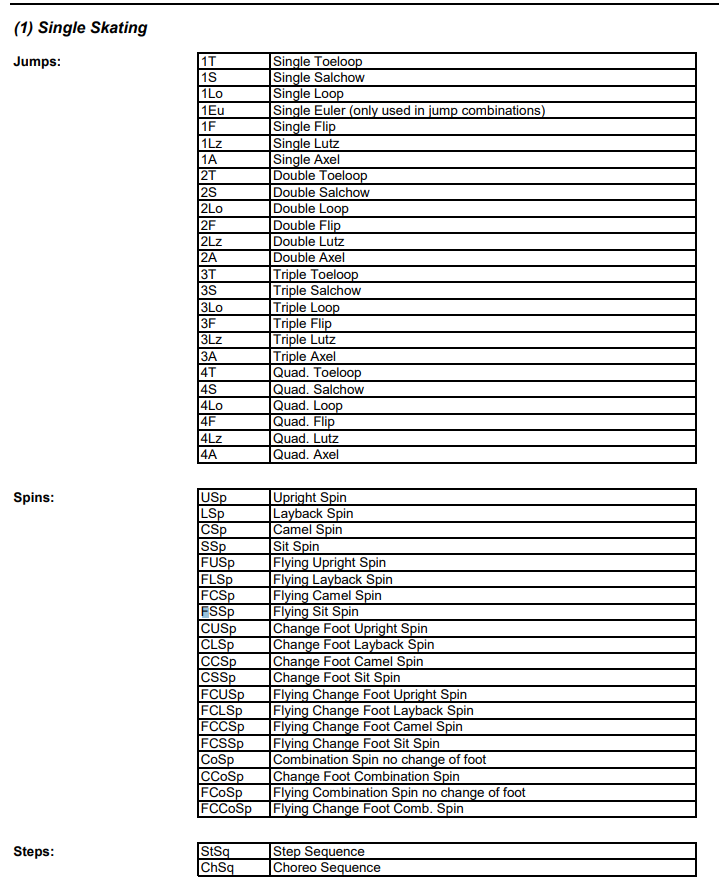

# Описание данных
1. **units**
   
Юнит – спортивная единица. Мы работаем с одиночным катанием, в одном юните только один
спортсмен. Если бы были пары/команды, то было б несколько спортсменов в юните.

- `unit_id`: идентификатор юнита
- `color`: категория
- `school_id`: идентификатор школы

2. **tournaments**

Турнир состоит из нескольких категорий, оценки по категориям расписаны в total_scores

- `tournament_id`: идентификатор турнира
- `date_start`: дата начала
- `date_end`: дата завершения
- `origin_id`: место проведения

3. **total_scores**
   
Оценки за выступления по категориям и общие за турнир

- `total_score_id`: идентификатор выступления, джойнится с `tournament_scores.total_score_id`
- `unit_id`: идентификатор юнита, ключ к `units.id`
- `tournament_id`: идентификатор турнира, `tournaments.id`
- `components_score`: артистизм (мастерство, композиция, хореография)
- `base_score`: базовая оценка за элементы в выступлении (идеал)
- `elements_score`: реальная оценка всех выполненных элементов, base_score+goe
- `decreasings_score`: снижения оценок за ошибки
- `total_score`: components_score+elements_score+decreasings_score за выступление
- `starting_place`:
- `place`: занятое место в категории category_name+segment_name
- `segment_name`: название сегмента
- `info`: комментарии и пояснения к оценке
- `overall_place`: итоговое место в турнире
- `overall_total_score`: итоговая оценка за весь турнир
- `overall_place_str`: комментарии, пояснения

4. **tournament_scores**

Таблица с оценками поэлементно

- `id`: идентификатор оценки за конкретный элемент/комбинацию
- `total_score_id`: идентикатор выступления, ключ `total_scores.id`
- `title`: запись элемента или комбинации элементов с отметками об ошибках
- `decrease`: за что снижена оценка
- `base_score`: базовая оценка (идеал, цена данного элемента/комбинации, сложность)
- `goe`: Grade of Execute, качество исполнения, судейские надбавки/убавки
- `avg_score`: оценка за элемент/комбинацию (усредненная по судьям)

In [1]:
# Стандартные библиотеки Python
import re
from warnings import simplefilter

# Сторонние библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn для машинного обучения
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

# IPython для отображения в Jupyter
from IPython.display import display, HTML

# Игнорирование предупреждений
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Настройка отображения в Jupyter
display(HTML("<style>.container { width:90% !important; }</style>"))

# Загрузка данных

In [2]:
units = pd.read_csv('units.csv').rename(columns={'id': 'unit_id'})
units.name = 'units'

tournaments = pd.read_csv('tournaments.csv', parse_dates=['date_start','date_end']).rename(columns={'id': 'tournament_id'})
tournaments.name = 'tournaments'

total_scores = pd.read_csv('total_scores.csv').rename(columns={'id': 'total_score_id'})
total_scores.name = 'total_scores'

tournament_scores = pd.read_csv('tournament_scores.csv')
tournament_scores.name = 'tournament_scores'

scores = pd.read_csv('scores.csv')
scores.name = 'scores'

In [3]:
all_data = [units, tournaments, total_scores, tournament_scores]
for i in all_data:
    print(i.name)
    display(i.head())

units


,unit_id,color,school_id
0,9474,green,244.0
1,733,green,203.0
2,734,green,235.0
3,735,green,168.0
4,736,green,168.0


tournaments


,tournament_id,date_start,date_end,origin_id
0,1,2090-11-29,2090-12-01,2.0
1,2,2091-03-06,2091-03-10,1.0
2,3,2090-10-05,2090-10-08,2.0
3,4,2090-10-18,2090-10-21,2.0
4,5,2090-10-21,2090-10-24,2.0


total_scores


,total_score_id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str
0,442027,304,4785,47.2,43.47,102.70,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2
1,442028,604,4785,45.4,46.71,101.19,54.48,0.0,18,2,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,1,294.75,1
2,442029,409,4785,44.0,46.82,99.20,52.38,0.0,6,3,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,4,285.57,4
3,442030,524,4785,46.2,44.86,91.84,47.98,-1.0,3,4,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,3,292.42,3
4,442031,412,4785,44.2,42.59,89.73,48.14,-1.0,15,5,Короткая программа,q Прыжок приземлён в четверть x Надбавка за пр...,6,265.34,6


tournament_scores


,id,total_score_id,title,decrease,base_score,goe,avg_score
0,1,1,2A,NaN,3.3,0.66,3.96
1,2,1,3F+3Lo,NaN,10.2,-0.11,10.09
2,3,1,3Lz,NaN,0.0,-1.30,5.19
3,4,1,CCoSp4,NaN,3.5,0.56,4.06
4,5,1,FCSp4,NaN,3.2,0.64,3.84


In [4]:
for i in all_data:
    print(i.name)
    display(i.info())

units
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit_id    4596 non-null   int64  
 1   color      4595 non-null   object 
 2   school_id  4007 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 107.8+ KB


None

tournaments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tournament_id  142 non-null    int64         
 1   date_start     142 non-null    datetime64[ns]
 2   date_end       142 non-null    datetime64[ns]
 3   origin_id      142 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 4.6 KB


None

total_scores
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21301 entries, 0 to 21300
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_score_id       21301 non-null  int64  
 1   unit_id              21301 non-null  int64  
 2   tournament_id        21301 non-null  int64  
 3   base_score           21301 non-null  float64
 4   components_score     21301 non-null  float64
 5   total_score          21301 non-null  float64
 6   elements_score       21301 non-null  float64
 7   decreasings_score    21301 non-null  float64
 8   starting_place       21301 non-null  int64  
 9   place                21301 non-null  int64  
 10  segment_name         21284 non-null  object 
 11  info                 20720 non-null  object 
 12  overall_place        21301 non-null  int64  
 13  overall_total_score  21284 non-null  float64
 14  overall_place_str    10814 non-null  object 
dtypes: float64(6), int64(6)

None

tournament_scores
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172158 entries, 0 to 172157
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              172158 non-null  int64  
 1   total_score_id  172158 non-null  int64  
 2   title           172158 non-null  object 
 3   decrease        41185 non-null   object 
 4   base_score      172158 non-null  float64
 5   goe             172158 non-null  float64
 6   avg_score       172158 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.2+ MB


None

In [5]:
for i in all_data:
    print(i.name)
    display(i.describe())

units


,unit_id,school_id
count,4596.000000,4007.000000
mean,5016.516971,464.135762
std,7355.726664,5679.988355
min,1.000000,1.000000
25%,1476.750000,62.000000
50%,2953.500000,117.000000
75%,4615.250000,206.000000
max,35024.000000,99999.000000


tournaments


,tournament_id,date_start,date_end,origin_id
count,142.000000,142,142,142.000000
mean,2671.232394,2091-06-03 12:10:08.450704384,2091-06-05 23:39:43.098591744,1.380282
min,1.000000,2089-09-20 00:00:00,2089-09-23 00:00:00,0.000000
25%,38.250000,2090-12-27 00:00:00,2091-01-01 06:00:00,1.000000
50%,93.500000,2091-04-15 12:00:00,2091-04-17 12:00:00,2.000000
75%,6692.500000,2092-01-06 12:00:00,2092-01-08 06:00:00,2.000000
max,7117.000000,2092-04-29 00:00:00,2092-05-03 00:00:00,2.000000
std,3129.148777,NaN,NaN,0.760108


total_scores


,total_score_id,unit_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,overall_place,overall_total_score
count,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21301.000000,21284.000000
mean,247946.268156,2342.803859,3146.281254,27.809781,31.324416,60.410021,27.836501,-0.240998,10.962819,10.619924,10.118117,117.443380
std,218940.086177,4370.220096,3279.412969,16.337113,17.330241,33.598123,17.745763,0.577598,8.352286,8.062790,8.003904,66.330049
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000
25%,9835.000000,418.000000,49.000000,15.560000,20.420000,35.880000,14.880000,0.000000,5.000000,4.000000,4.000000,69.315000
50%,442628.000000,1233.000000,267.000000,24.490000,26.660000,52.630000,24.270000,0.000000,9.000000,9.000000,8.000000,119.660000
75%,450362.000000,2217.000000,6859.000000,35.110000,41.600000,75.720000,35.910000,0.000000,15.000000,15.000000,15.000000,168.700000
max,463639.000000,35024.000000,7117.000000,94.420000,95.900000,201.650000,112.420000,0.000000,54.000000,50.000000,50.000000,323.050000


tournament_scores


,id,total_score_id,base_score,goe,avg_score
count,172158.000000,172158.000000,172158.000000,172158.000000,172158.000000
mean,148848.485444,243100.514156,2.574300,0.131771,3.567541
std,107651.944104,219065.848493,2.151716,0.797761,2.424646
min,1.000000,1.000000,0.000000,-5.750000,0.000000
25%,50613.250000,9385.000000,1.100000,-0.120000,1.980000
50%,158772.500000,442337.000000,2.600000,0.210000,3.250000
75%,223563.750000,449883.750000,3.300000,0.600000,4.200000
max,353806.000000,463639.000000,15.700000,5.060000,23.360000


**Вывод:**

Ярких выбросов не видно, есть типы данных, которые можно изменить.

## Обьединение таблиц

In [6]:
for i in all_data:
    print(i.name)
    display(i.shape)

units


(4596, 3)

tournaments


(142, 4)

total_scores


(21301, 15)

tournament_scores


(172158, 7)

**Join with units**

In [7]:
merged_df = total_scores.set_index('unit_id').join(units.set_index('unit_id'), how='inner').reset_index()
print(merged_df.shape)
display(merged_df.head(1))

(21301, 17)


,unit_id,total_score_id,tournament_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str,color,school_id
0,304,442027,4785,47.2,43.47,102.7,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2,lime,62.0


**Join with tournament**

In [8]:
merged_df = merged_df.set_index('tournament_id').join(tournaments.set_index('tournament_id'), how='inner').reset_index()
print(merged_df.shape)
display(merged_df.head(1))

(21301, 20)


,tournament_id,unit_id,total_score_id,base_score,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,overall_place_str,color,school_id,date_start,date_end,origin_id
0,4785,304,442027,47.2,43.47,102.7,59.23,0.0,17,1,Короткая программа,x Надбавка за прыжки во второй половине програ...,2,293.74,2,lime,62.0,2091-12-20,2091-12-24,2.0


**Join with tournament_scores**

In [9]:
merged_df = merged_df.set_index('total_score_id').join(tournament_scores.set_index('total_score_id'), 
                                                          how='inner', lsuffix='_total', rsuffix='_tournament').reset_index()
print(merged_df.shape)
display(merged_df.head(1))

(172158, 26)


,total_score_id,tournament_id,unit_id,base_score_total,components_score,total_score,elements_score,decreasings_score,starting_place,place,...,school_id,date_start,date_end,origin_id,id,title,decrease,base_score_tournament,goe,avg_score
0,442027,4785,304,47.2,43.47,102.7,59.23,0.0,17,1,...,62.0,2091-12-20,2091-12-24,2.0,156223,4Lz,NaN,11.5,3.78,15.28


In [10]:
merged_df.head()

,total_score_id,tournament_id,unit_id,base_score_total,components_score,total_score,elements_score,decreasings_score,starting_place,place,...,school_id,date_start,date_end,origin_id,id,title,decrease,base_score_tournament,goe,avg_score
0,442027,4785,304,47.2,43.47,102.7,59.23,0.0,17,1,...,62.0,2091-12-20,2091-12-24,2.0,156223,4Lz,NaN,11.5,3.78,15.28
1,442027,4785,304,47.2,43.47,102.7,59.23,0.0,17,1,...,62.0,2091-12-20,2091-12-24,2.0,156224,4S+3T,NaN,13.9,2.49,16.39
2,442027,4785,304,47.2,43.47,102.7,59.23,0.0,17,1,...,62.0,2091-12-20,2091-12-24,2.0,156225,FCSp4,NaN,3.2,0.87,4.07
3,442027,4785,304,47.2,43.47,102.7,59.23,0.0,17,1,...,62.0,2091-12-20,2091-12-24,2.0,156226,3A,NaN,0.0,2.40,11.20
4,442027,4785,304,47.2,43.47,102.7,59.23,0.0,17,1,...,62.0,2091-12-20,2091-12-24,2.0,156227,StSq3,NaN,3.3,0.85,4.15


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172158 entries, 0 to 172157
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   total_score_id         172158 non-null  int64         
 1   tournament_id          172158 non-null  int64         
 2   unit_id                172158 non-null  int64         
 3   base_score_total       172158 non-null  float64       
 4   components_score       172158 non-null  float64       
 5   total_score            172158 non-null  float64       
 6   elements_score         172158 non-null  float64       
 7   decreasings_score      172158 non-null  float64       
 8   starting_place         172158 non-null  int64         
 9   place                  172158 non-null  int64         
 10  segment_name           172115 non-null  object        
 11  info                   168356 non-null  object        
 12  overall_place          172158 non-null  int6

обьединение колон времени

*Вывод:*

Объединили данные 

## Очистка данных

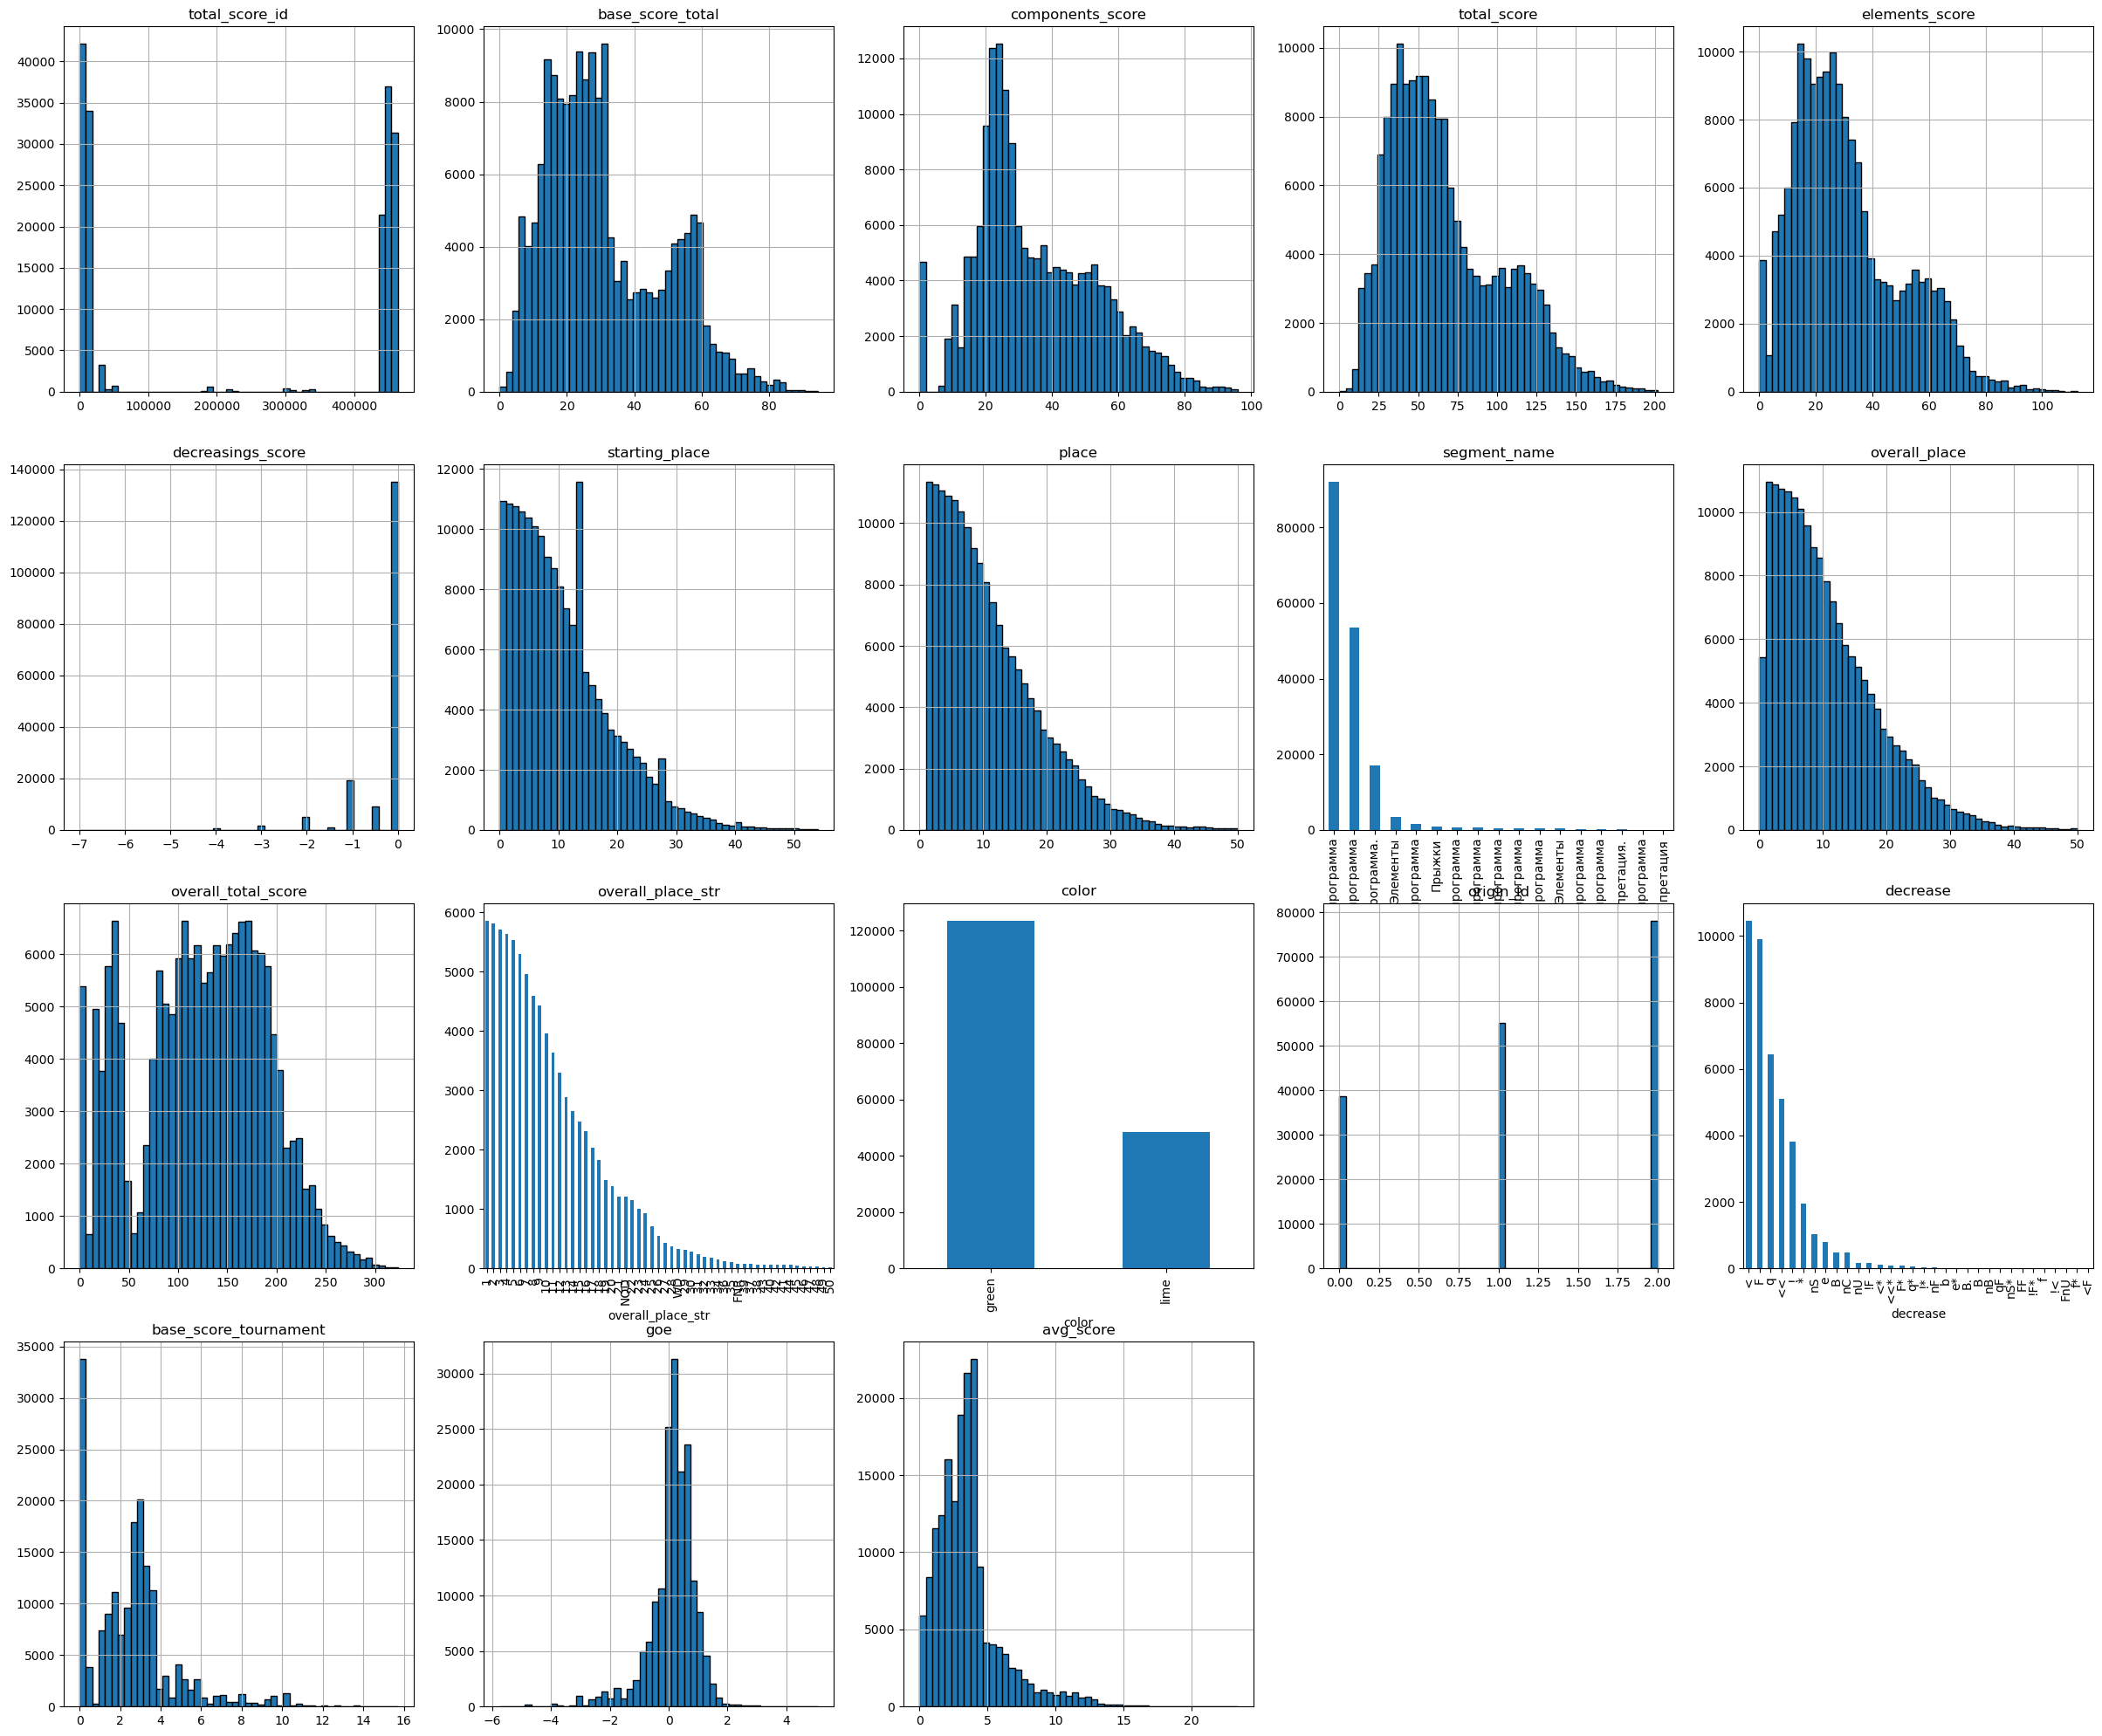

In [12]:
fig = plt.figure(figsize=(30, 25))

columns_to_drop = ['id', 'unit_id', 'tournament_id','info','title','school_id','date_start','date_end'] 
valid_columns = merged_df.columns.drop(columns_to_drop, errors='ignore')

for i, column in enumerate(valid_columns):
    ax = fig.add_subplot(4, 5, i + 1)

    if pd.api.types.is_object_dtype(merged_df[column]):
        merged_df[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(column)
    elif pd.api.types.is_integer_dtype(merged_df[column]) or pd.api.types.is_float_dtype(merged_df[column]):
        merged_df[column].hist(bins=50, ec='black', ax = ax)
        ax.set_title(column)

plt.show()

In [13]:
merged_df.isna().sum()

total_score_id                0
tournament_id                 0
unit_id                       0
base_score_total              0
components_score              0
total_score                   0
elements_score                0
decreasings_score             0
starting_place                0
place                         0
segment_name                 43
info                       3802
overall_place                 0
overall_total_score          43
overall_place_str         86212
color                         0
school_id                  7245
date_start                    0
date_end                      0
origin_id                     0
id                            0
title                         0
decrease                 130973
base_score_tournament         0
goe                           0
avg_score                     0
dtype: int64

In [14]:
merged_df.shape

(172158, 26)

In [15]:
merged_df.query('segment_name.isna()&overall_total_score.isna()').isna().sum()

total_score_id            0
tournament_id             0
unit_id                   0
base_score_total          0
components_score          0
total_score               0
elements_score            0
decreasings_score         0
starting_place            0
place                     0
segment_name             43
info                     43
overall_place             0
overall_total_score      43
overall_place_str        43
color                     0
school_id                18
date_start                0
date_end                  0
origin_id                 0
id                        0
title                     0
decrease                 43
base_score_tournament     0
goe                       0
avg_score                 0
dtype: int64

Видим, что есть строчки где есть пропуски в 5ти нужных нам столбцах, поэтому мы их удаляем

In [16]:
merged_df = merged_df.query('not(segment_name.isna()&overall_total_score.isna())')
print(f'{(43*100)/172158}% - удаленный процент от общего значения')
display(merged_df.isna().sum())

0.024977055960222587% - удаленный процент от общего значения


total_score_id                0
tournament_id                 0
unit_id                       0
base_score_total              0
components_score              0
total_score                   0
elements_score                0
decreasings_score             0
starting_place                0
place                         0
segment_name                  0
info                       3759
overall_place                 0
overall_total_score           0
overall_place_str         86169
color                         0
school_id                  7227
date_start                    0
date_end                      0
origin_id                     0
id                            0
title                         0
decrease                 130930
base_score_tournament         0
goe                           0
avg_score                     0
dtype: int64

In [17]:
merged_df['info'].unique()

array(['x Надбавка за прыжки во второй половине программы (10%)',
       'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%)',
       'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе',
       ..., 'Нарушения в костюме:@@@(1 of 3)',
       "* Недопустимый элемент q Прыжок приземлён в четверть < Недокрученный прыжок << Пониженный прыжок F Падение в элементе nU Нет базовой позиции 'стоя'",
       "q Прыжок приземлён в четверть < Недокрученный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) nU Нет базовой позиции 'стоя'"],
      dtype=object)

In [18]:
merged_df['info'] = merged_df['info'].fillna('no_mark_comm')
merged_df.isna().sum()

total_score_id                0
tournament_id                 0
unit_id                       0
base_score_total              0
components_score              0
total_score                   0
elements_score                0
decreasings_score             0
starting_place                0
place                         0
segment_name                  0
info                          0
overall_place                 0
overall_total_score           0
overall_place_str         86169
color                         0
school_id                  7227
date_start                    0
date_end                      0
origin_id                     0
id                            0
title                         0
decrease                 130930
base_score_tournament         0
goe                           0
avg_score                     0
dtype: int64

удаляем столбцы `decrease` и `overall_place_str`, тк они содержат повторяющуюся информацию

In [19]:
merged_df = merged_df.drop('decrease',axis = 1)
merged_df = merged_df.drop('overall_place_str',axis = 1)

Так как нас интересуют конкретно школы - удаляем все пропуски в id

In [20]:
merged_df = merged_df.query('not(school_id.isna())')
print(f'{((7014*100)/172158)+0.025}% - удаленный процент от общего значения')
merged_df.isna().sum()

4.099164430348866% - удаленный процент от общего значения


total_score_id           0
tournament_id            0
unit_id                  0
base_score_total         0
components_score         0
total_score              0
elements_score           0
decreasings_score        0
starting_place           0
place                    0
segment_name             0
info                     0
overall_place            0
overall_total_score      0
color                    0
school_id                0
date_start               0
date_end                 0
origin_id                0
id                       0
title                    0
base_score_tournament    0
goe                      0
avg_score                0
dtype: int64

*Вывод:*
- удалили строчки где есть пропуски в 5ти нужных нам столбцах, поэтому мы их удаляем (43 штуки)(0.025%)
- Так как нас интересуют конкретно школы - удаляем все пропуски в id(4%)
- удаляем столбцы `decrease` и `overall_place_str`, тк они содержат повторяющуюся информацию
- В столбце info содержится информация - коментарии к оценки, можем заменить nan на no_mark_comm

**Вывод**
- Объединили данные
- удалили строчки где есть пропуски в 5ти нужных нам столбцах, поэтому мы их удаляем (43 штуки)(0.025%)
- Так как нас интересуют конкретно школы - удаляем все пропуски в id(4%)
- удаляем столбцы `decrease` и `overall_place_str`, тк они содержат повторяющуюся информацию
- В столбце info содержится информация - коментарии к оценки, можем заменить nan на no_mark_comm

# Предобработка данных

## Измения типа данных

In [21]:
merged_df['school_id'] = merged_df['school_id'].astype('int64')
merged_df['school_id'].dtype

dtype('int64')

Изменили тип данных в  `school_id` на int

## Дубликаты

In [22]:
merged_df.duplicated().sum()

0

нет полных дубликатов

## Уникальные значения

In [23]:
for columns in merged_df.select_dtypes('object').columns:
    print(columns)
    print(merged_df[columns].unique())

segment_name
['Короткая программа' 'Произвольная программа' 'Произвольная программа.'
 'Элементы' 'Интерпретация' 'Интерпретация.' 'Кoроткая программа'
 'Произвольнaя программа' 'Пpoизвoльнaя пpoгpaммa' 'Кopoткaя пpoгpaммa'
 'Элeмeнты' 'Коpоткая программа' 'Пpoизвольная программа' 'Прыжки'
 'Kopoткaя пpoгpaммa' 'Пpoизвольнaя программа' 'Прoизвольная прoграмма']
info
['x Надбавка за прыжки во второй половине программы (10%)'
 'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%)'
 'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе'
 ... 'Нарушения в костюме:@@@(1 of 3)'
 "* Недопустимый элемент q Прыжок приземлён в четверть < Недокрученный прыжок << Пониженный прыжок F Падение в элементе nU Нет базовой позиции 'стоя'"
 "q Прыжок приземлён в четверть < Недокрученный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) nU Нет базовой позиции 'стоя'"]
color
['l

Видим очень много повторов, почистим повторы в `segment_name` и `decrease`

In [24]:
replacement_map = {
        'Кoроткая программа': 'Короткая программа',
        'Кopoткaя пpoгpaммa': 'Короткая программа',
        'Коpоткая программа': 'Короткая программа',
        'Kopoткaя пpoгpaммa': 'Короткая программа',
        'Произвольная программа.': 'Произвольная программа',  # Corrected the replacement values
        'Пpoизвольная программа': 'Произвольная программа',
        'Пpoизвольнaя программа': 'Произвольная программа',
        'Прoизвольная прoграмма': 'Произвольная программа',
        'Произвольнaя программа': 'Произвольная программа',
        'Пpoизвoльнaя пpoгpaммa': 'Произвольная программа',
        'Элeмeнты': 'Элементы',
        'Интерпретация.': 'Интерпретация',}

merged_df['segment_name'] = merged_df['segment_name'].replace(replacement_map)

for columns in merged_df.select_dtypes('object').columns:
    print(columns)
    print(merged_df[columns].unique())

segment_name
['Короткая программа' 'Произвольная программа' 'Элементы' 'Интерпретация'
 'Прыжки']
info
['x Надбавка за прыжки во второй половине программы (10%)'
 'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%)'
 'q Прыжок приземлён в четверть x Надбавка за прыжки во второй половине программы (10%) F Падение в элементе'
 ... 'Нарушения в костюме:@@@(1 of 3)'
 "* Недопустимый элемент q Прыжок приземлён в четверть < Недокрученный прыжок << Пониженный прыжок F Падение в элементе nU Нет базовой позиции 'стоя'"
 "q Прыжок приземлён в четверть < Недокрученный прыжок ! Неясное ребро на толчке F/Lz x Надбавка за прыжки во второй половине программы (10%) nU Нет базовой позиции 'стоя'"]
color
['lime' 'green']
title
['4Lz' '4S+3T' 'FCSp4' ... '2Lo+2Lo+1A+SЕQ' '2F+1A+2Lo+SЕQ'
 '2Lz!+1A+2Lo<+SЕQ']


**Вывод:**
- Изменили тип данных в  `school_id` на int
- нет полных дубликатов
- Видим очень много повторов, почистили повторы в segment_name
- Столбец decrease решила полностью взять из инфо

# Исследовательский анализ данных

## Посмотрим на выбросы

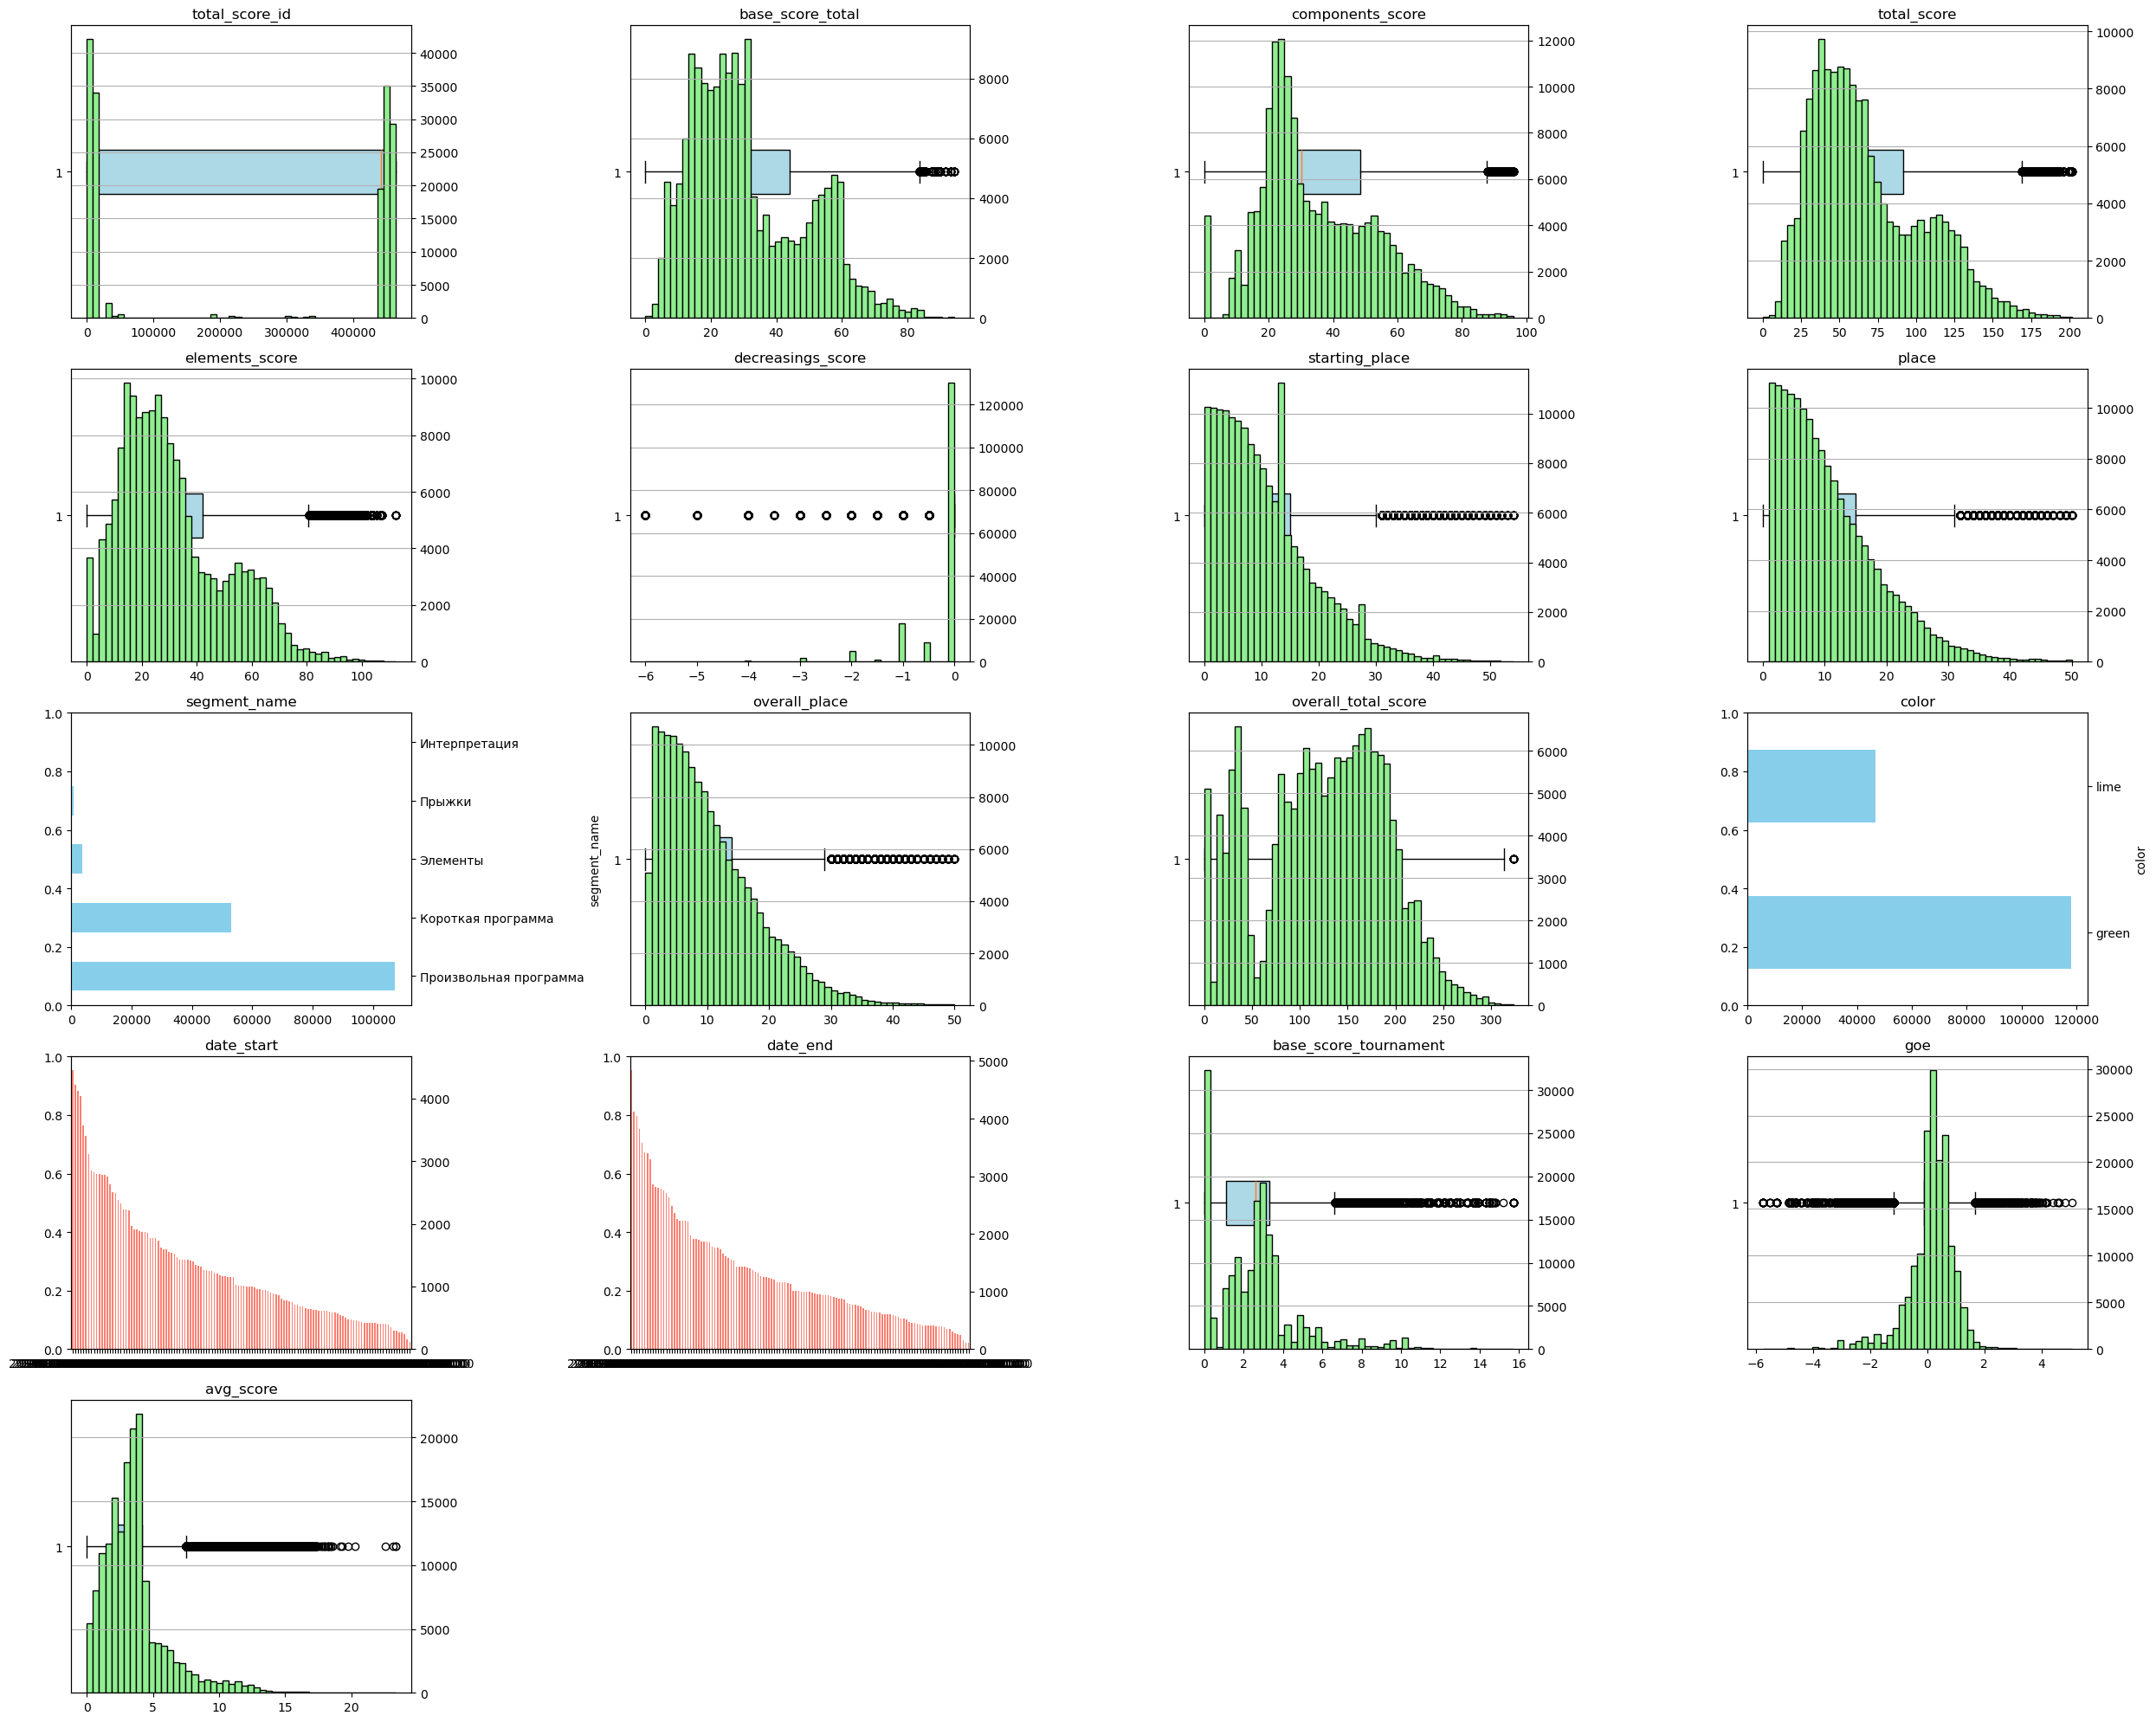

In [25]:
fig = plt.figure(figsize=(25, 20))
# Столбцы, которые нужно исключить
columns_to_drop = ['id', 'unit_id', 'info', 'title', 'tournament_id', 'school_id','origin_id']
for i, column in enumerate(merged_df.columns.drop(columns_to_drop, errors='ignore')):
    ax = fig.add_subplot(5, 4, i + 1)
    ax_hist = ax.twinx()  
    if merged_df[column].dtype == 'object':
        merged_df[column].value_counts().plot(kind='barh', color='skyblue')
        plt.title(column)
    elif (merged_df[column].dtype == 'int64' or merged_df[column].dtype == 'float'):
        merged_df[column].hist(bins = 50, ec='black', color='lightgreen')
        ax.boxplot(merged_df[column], vert=False, patch_artist=True, boxprops={'facecolor': 'lightblue'})
        plt.title(column)
    elif merged_df[column].dtype == 'datetime64[ns]':
        merged_df[column].value_counts().plot(kind='bar', color='salmon')
        ax.set_title(column)
plt.tight_layout()
plt.show();

Исследуем маленькие соревнования - `tournament_id`. Посмотрим стоит ли их удалять

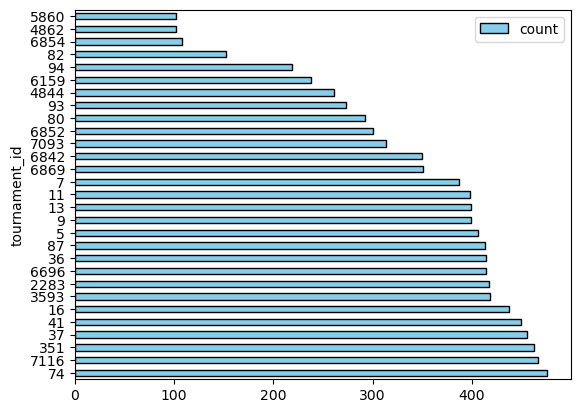

In [26]:
filtered_df = pd.DataFrame(merged_df['tournament_id'].value_counts())
filtered_df.query('count<=500').plot(kind='barh', color='skyblue', edgecolor='black')
plt.show()

In [27]:
filtered_df = filtered_df.query('count<=150')
filtered_df

,count
tournament_id,
6854,108
4862,102
5860,102


tournament_id ==6854      всего участников 18


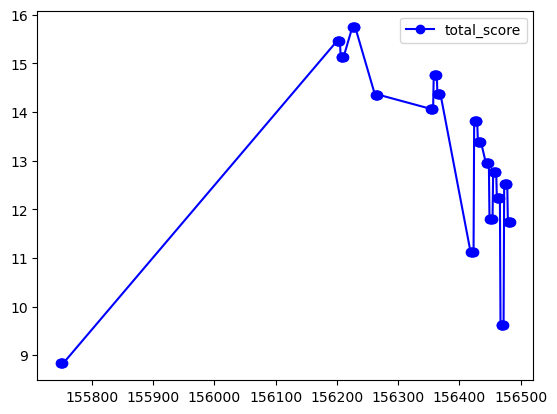

tournament_id ==4862      всего участников 18


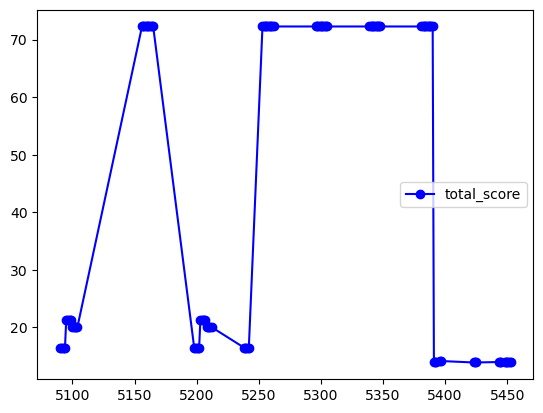

tournament_id ==5860      всего участников 12


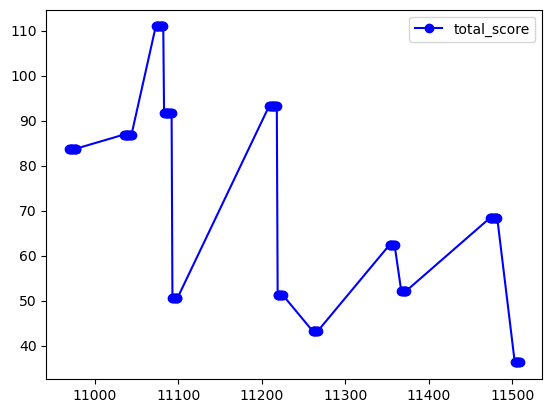

In [28]:
j = [i for i in filtered_df.index]
print('tournament_id ==6854      всего участников',len(pd.DataFrame(merged_df.query('tournament_id ==6854'))['total_score_id'].unique()))
pd.DataFrame(merged_df.query('tournament_id ==6854')['total_score']).plot( marker='o', color='blue');
plt.show()
print('tournament_id ==4862      всего участников',len(pd.DataFrame(merged_df.query('tournament_id ==4862'))['total_score_id'].unique()))
pd.DataFrame(merged_df.query('tournament_id ==4862')['total_score']).plot( marker='o', color='blue');
plt.show()
print('tournament_id ==5860      всего участников',len(pd.DataFrame(merged_df.query('tournament_id ==5860'))['total_score_id'].unique()))
pd.DataFrame(merged_df.query('tournament_id ==5860')['total_score']).plot( marker='o', color='blue');
plt.show()

Посмотрим на элемент интерпретация

In [29]:
to_drop = merged_df[merged_df['segment_name'] == 'Интерпретация']['total_score_id'].unique()
to_drop

array([442582, 442583, 442584, 442594, 442627, 442629, 442646],
      dtype=int64)

In [30]:
pd.set_option('display.max_columns',None)
merged_df[merged_df['total_score_id']==442646]

,total_score_id,tournament_id,unit_id,base_score_total,components_score,total_score,elements_score,decreasings_score,starting_place,place,segment_name,info,overall_place,overall_total_score,color,school_id,date_start,date_end,origin_id,id,title,base_score_tournament,goe,avg_score
5443,442646,4862,9508,0.0,14.0,14.0,0.0,0.0,1,1,Интерпретация,no_mark_comm,1,14.0,green,27,2091-12-09,2091-12-09,1.0,160989,S,0.0,0.0,0.0
5444,442646,4862,9508,0.0,14.0,14.0,0.0,0.0,1,1,Интерпретация,no_mark_comm,1,14.0,green,27,2091-12-09,2091-12-09,1.0,160990,Lo,0.0,0.0,0.0
5445,442646,4862,9508,0.0,14.0,14.0,0.0,0.0,1,1,Интерпретация,no_mark_comm,1,14.0,green,27,2091-12-09,2091-12-09,1.0,160991,Sp,0.0,0.0,0.0


Видим, что спорсмены во всех id участвуют исключительно в ней и допускают ошибки. Удалим эту категорию воизбежании лишних значений

In [31]:
merged_df = merged_df.query('total_score_id not in @to_drop')

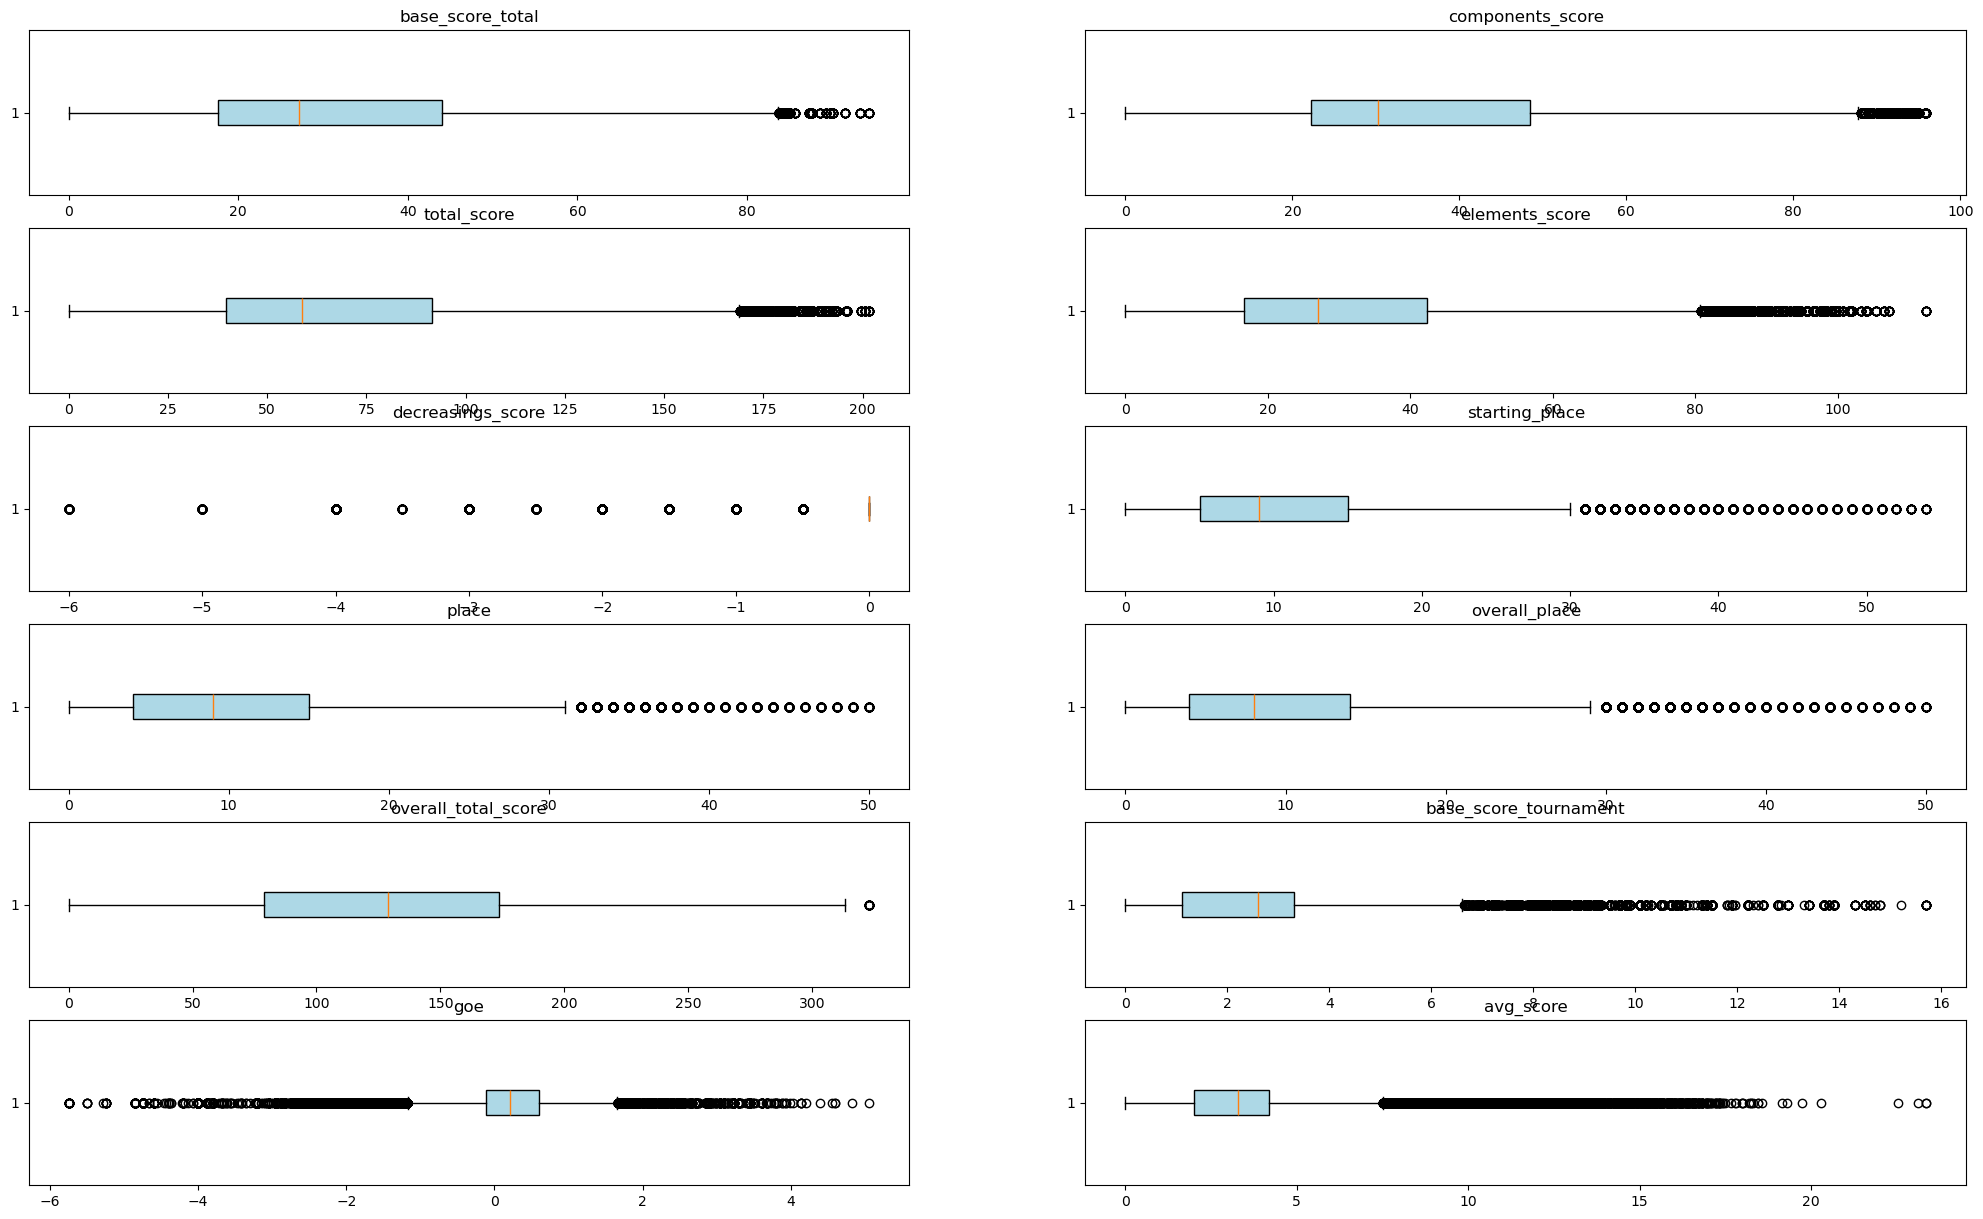

In [32]:
fig = plt.figure(figsize=(25, 15))
columns_to_drop = ['id', 'unit_id', 'tournament_id', 'info', 'title', 'school_id', 'total_score_id', 'origin_id']
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns.drop(columns_to_drop, errors='ignore')
for i, column in enumerate(numeric_columns):
    ax = fig.add_subplot(6, 2, i + 1)
    ax.boxplot(merged_df[column], vert=False, patch_artist=True, boxprops={'facecolor': 'lightblue'})
    ax.set_title(column)

In [33]:
merged_df.drop([col for col in merged_df.columns if col.endswith('id')],axis =1).describe().T

,count,mean,min,25%,50%,75%,max,std
base_score_total,164855.0,31.20293,0.0,17.63,27.18,44.06,94.42,17.401989
components_score,164855.0,35.177566,0.0,22.19,30.29,48.46,95.9,18.132704
total_score,164855.0,67.537875,0.0,39.71,58.86,91.425,201.65,35.881188
elements_score,164855.0,31.15964,0.0,16.67,27.05,42.3,112.42,19.09464
decreasings_score,164855.0,-0.249674,-6.0,0.0,0.0,0.0,0.0,0.597
starting_place,164855.0,10.877238,0.0,5.0,9.0,15.0,54.0,8.182005
place,164855.0,10.41767,0.0,4.0,9.0,15.0,50.0,7.868323
overall_place,164855.0,10.016821,0.0,4.0,8.0,14.0,50.0,7.825138
overall_total_score,164855.0,124.229227,0.0,78.95,128.91,173.79,323.05,65.290457
date_start,164855,2091-06-22 06:35:17.482637824,2089-09-20 00:00:00,2091-01-17 00:00:00,2091-04-21 00:00:00,2092-02-02 00:00:00,2092-04-29 00:00:00,NaN


**Вывод**
- Видим небольшие выбросы, но не будем их удалять
- Удалили id спорсменов у которых был элемент интерпритация
- Посмотрели на самые маленькие соревнования. И как распределяются в них значения  

## Распарсим элементы

Удаляем все ненужные и перегруженные столбцы

In [34]:
df = merged_df.copy()
df = df.drop(['avg_score','base_score_tournament','id','info', 'decreasings_score'],axis = 1)
df.head(5)

,total_score_id,tournament_id,unit_id,base_score_total,components_score,total_score,elements_score,starting_place,place,segment_name,overall_place,overall_total_score,color,school_id,date_start,date_end,origin_id,title,goe
0,442027,4785,304,47.2,43.47,102.7,59.23,17,1,Короткая программа,2,293.74,lime,62,2091-12-20,2091-12-24,2.0,4Lz,3.78
1,442027,4785,304,47.2,43.47,102.7,59.23,17,1,Короткая программа,2,293.74,lime,62,2091-12-20,2091-12-24,2.0,4S+3T,2.49
2,442027,4785,304,47.2,43.47,102.7,59.23,17,1,Короткая программа,2,293.74,lime,62,2091-12-20,2091-12-24,2.0,FCSp4,0.87
3,442027,4785,304,47.2,43.47,102.7,59.23,17,1,Короткая программа,2,293.74,lime,62,2091-12-20,2091-12-24,2.0,3A,2.40
4,442027,4785,304,47.2,43.47,102.7,59.23,17,1,Короткая программа,2,293.74,lime,62,2091-12-20,2091-12-24,2.0,StSq3,0.85


Соединяем значения в `goe` и  в `title` - два самых важных признака

In [35]:
df_grouped = df.groupby('total_score_id').agg({
    'tournament_id': 'first',  # Берем первое значение для остальных столбцов
    'unit_id': 'first',
    'base_score_total': 'first',
    'components_score': 'first',
    'total_score': 'first',
    'elements_score': 'first',
    'starting_place': 'first',
    'place': 'first',
    'segment_name': 'first',
    'overall_place': 'first',
    'overall_total_score': 'first',
    'color': 'first',
    'school_id': 'first',
    'date_start': 'first',
    'date_end': 'first',
    'origin_id': 'first',
    'goe': lambda x: '/'.join(x.astype(str).tolist()),
    'title': '/'.join  # Объединяем строки столбца 'title' через '+'
}).reset_index()
display(df_grouped.head(5)), df_grouped.shape

,total_score_id,tournament_id,unit_id,base_score_total,components_score,total_score,elements_score,starting_place,place,segment_name,overall_place,overall_total_score,color,school_id,date_start,date_end,origin_id,goe,title
0,1,1,1,31.99,24.67,56.86,33.19,2,5,Короткая программа,4,164.44,green,198,2090-11-29,2090-12-01,2.0,0.66/-0.11/-1.3/0.56/0.64/0.49/0.26,2A/3F+3Lo/3Lz/CCoSp4/FCSp4/LSp4/StSq2
1,8,1,1,57.30,49.40,107.58,58.18,2,4,Произвольная программа,4,164.44,green,198,2090-11-29,2090-12-01,2.0,0.53/0.42/-1.91/-0.85/-0.47/0.43/0.35/0.6/0.45...,2A/3F/3Fq+3Loq/3Lz<+1Eu+2F/3Lzq+2T/3S/CCoSp4/C...
2,19,1,1426,32.01,28.66,67.35,38.69,4,1,Короткая программа,1,201.45,green,251,2090-11-29,2090-12-01,2.0,0.99/0.88/1.53/0.7/0.9/0.76/0.92,2A/3Lo/3Lz+3T/CCoSp4/FCSp4/LSp4/StSq3
3,26,1,1426,62.24,60.07,134.10,74.03,6,1,Произвольная программа,1,201.45,green,251,2090-11-29,2090-12-01,2.0,0.79/0.84/1.17/0.98/0.98/1.53/1.42/0.42/1.0/0....,2A/2A+3T/3F/3Lo/3Lo+2T/3Lz/3Lz+1Eu+3S/CCoSp4/C...
4,38,1,3,31.93,25.87,60.75,34.88,1,3,Короткая программа,5,161.10,green,75,2090-11-29,2090-12-01,2.0,0.86/-0.11/0.35/0.36/0.36/0.54/0.59,2A/3F/3Lz+3Lo/CCoSp3/FSSp4/LSp4/StSq3


(None, (20368, 19))

Находим медиану по которой будем смотреть насколько хорошо спорсмен выполнил элемент. 

Считаем >= 0.21 как идеально, меньше как ошибку

In [36]:
merged_df_goe_median = merged_df['goe'].median()
merged_df_goe_median

0.21

In [37]:
# Множество нежелательных символов
no_el = {'!', '<', '<<', '*', 'COMBO','1', 'SЕQ', 'REP', 'SEQ', 'eq', 'qe', 'eV', 'Ve', 'Vq', 'qV'}

# Функция для удаления q, e, V только в начале или конце строки
def remove_qeV(text):
    return re.sub(r"^[qeV]|[qeV]$", "", text)

# Функция для очистки элемента
def clean_element(element):
    # Удаляем нежелательные символы
    cleaned_element = ''.join(c for c in element if c not in no_el).strip()
    if cleaned_element != 'StSq':
        # Удаляем q, e, V в конце строки
        cleaned_element = remove_qeV(cleaned_element)
        # Удаляем 'e' в конце строки (дополнительная очистка)
        cleaned_element = re.sub(r"e$", "", cleaned_element)
    return cleaned_element

# Основная обработка уникальных элементов
cleaned_elements = set()

for title in df_grouped['title'].unique():
    # Разделяем title по '/'
    parts = title.split('/')
    for part in parts:
        # Разделяем part по '+'
        sub_parts = part.split('+')
        for sub_part in sub_parts:
            # Очищаем элемент
            element = clean_element(sub_part)
            if element and element not in no_el:
                cleaned_elements.add(element)

# Вывод уникальных очищенных элементов
print(f"Уникальные очищенные элементы: {', '.join(sorted(cleaned_elements))}")

Уникальные очищенные элементы: 2A, 2F, 2Lo, 2Lz, 2S, 2T, 3A, 3F, 3Lo, 3Lz, 3S, 3T, 4F, 4Lo, 4Lz, 4S, 4T, A, CCSp, CCSp2, CCSp3, CCSp4, CCSpB, CCoSp, CCoSp2, CCoSp3, CCoSp4, CCoSpB, CSSp, CSSp2, CSSp3, CSSp4, CSSpB, CSp, CSp2, CSp3, CSp4, CSpB, ChS, ChSpl, CoSp, CoSp2, CoSpB, Eu, F, FCCSp4, FCCoSp, FCCoSp2, FCCoSp3, FCCoSp4, FCCoSpB, FCSSp, FCSSp2, FCSSp3, FCSSp4, FCSSpB, FCSp, FCSp2, FCSp3, FCSp4, FCSpB, FCoSp, FCoSp2, FLSp2, FLSp3, FLSp4, FSSp, FSSp2, FSSp3, FSSp4, FSSpB, FSsp2, FUSp, LSp, LSp2, LSp3, LSp4, LSpB, Lo, Lz, S, SSp, SSp2, SSp3, SSp4, SSpB, Sp, StSq, StSq2, StSq3, StSq4, StSqB, T, USpB, W


In [38]:
len(cleaned_elements)

95

In [39]:
# Функция для присвоения значений
def assign_values(row, merged_df_goe_median, cleaned_elements):
    title_elements = row['title'].split('/')
    goe_values = [float(x) for x in row['goe'].split('/')]

    # Словарь для хранения лучших значений goe для каждого элемента
    best_goe = {}

    for i, part in enumerate(title_elements):
        # Разделяем part по '+'
        sub_parts = part.split('+')
        for j, sub_part in enumerate(sub_parts):
            # Очищаем элемент
            cleaned_element = clean_element(sub_part)
            if cleaned_element in cleaned_elements:
                if i < len(goe_values):
                    goe_value = goe_values[i]
                    # Проверяем, нужно ли очищать элемент
                    if any(c in sub_part for c in no_el):
                        # Если элемент содержит нежелательные символы, присваиваем 0
                        best_goe[cleaned_element] = 0
                    else:
                        # Обновляем лучший goe для элемента
                        if cleaned_element not in best_goe or goe_value > best_goe[cleaned_element]:
                            best_goe[cleaned_element] = goe_value

    # Присваиваем значения на основе лучшего goe
    for element, goe_value in best_goe.items():
        column_name = f'{element}_element_perfect'
        row[column_name] = 1 if goe_value >= merged_df_goe_median else 0

    return row

# Применяем функцию для создания новых столбцов и присвоения значений
df_grouped = df_grouped.apply(lambda row: assign_values(row, merged_df_goe_median, cleaned_elements), axis=1)

# Выводим первые строки результата
display(df_grouped.head(7))

,2A_element_perfect,2F_element_perfect,2Lo_element_perfect,2Lz_element_perfect,2S_element_perfect,2T_element_perfect,3A_element_perfect,3F_element_perfect,3Lo_element_perfect,3Lz_element_perfect,3S_element_perfect,3T_element_perfect,4F_element_perfect,4Lo_element_perfect,4Lz_element_perfect,4S_element_perfect,4T_element_perfect,A_element_perfect,CCSp2_element_perfect,CCSp3_element_perfect,CCSp4_element_perfect,CCSpB_element_perfect,CCSp_element_perfect,CCoSp2_element_perfect,CCoSp3_element_perfect,CCoSp4_element_perfect,CCoSpB_element_perfect,CCoSp_element_perfect,CSSp2_element_perfect,CSSp3_element_perfect,CSSp4_element_perfect,CSSpB_element_perfect,CSSp_element_perfect,CSp2_element_perfect,CSp3_element_perfect,CSp4_element_perfect,CSpB_element_perfect,CSp_element_perfect,ChS_element_perfect,ChSpl_element_perfect,CoSp2_element_perfect,CoSpB_element_perfect,CoSp_element_perfect,Eu_element_perfect,FCCSp4_element_perfect,FCCoSp2_element_perfect,FCCoSp3_element_perfect,FCCoSp4_element_perfect,FCCoSpB_element_perfect,FCCoSp_element_perfect,FCSSp2_element_perfect,FCSSp3_element_perfect,FCSSp4_element_perfect,FCSSpB_element_perfect,FCSSp_element_perfect,FCSp2_element_perfect,FCSp3_element_perfect,FCSp4_element_perfect,FCSpB_element_perfect,FCSp_element_perfect,FCoSp2_element_perfect,FCoSp_element_perfect,FLSp2_element_perfect,FLSp3_element_perfect,FLSp4_element_perfect,FSSp2_element_perfect,FSSp3_element_perfect,FSSp4_element_perfect,FSSpB_element_perfect,FSSp_element_perfect,FSsp2_element_perfect,FUSp_element_perfect,F_element_perfect,LSp2_element_perfect,LSp3_element_perfect,LSp4_element_perfect,LSpB_element_perfect,LSp_element_perfect,Lo_element_perfect,Lz_element_perfect,SSp2_element_perfect,SSp3_element_perfect,SSp4_element_perfect,SSpB_element_perfect,SSp_element_perfect,S_element_perfect,Sp_element_perfect,StSq2_element_perfect,StSq3_element_perfect,StSq4_element_perfect,StSqB_element_perfect,StSq_element_perfect,T_element_perfect,USpB_element_perfect,W_element_perfect,base_score_total,color,components_score,date_end,date_start,elements_score,goe,origin_id,overall_place,overall_total_score,place,school_id,segment_name,starting_place,title,total_score,total_score_id,tournament_id,unit_id
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.99,green,24.67,2090-12-01,2090-11-29,33.19,0.66/-0.11/-1.3/0.56/0.64/0.49/0.26,2.0,4,164.44,5,198,Короткая программа,2,2A/3F+3Lo/3Lz/CCoSp4/FCSp4/LSp4/StSq2,56.86,1,1,1
1,1.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.30,green,49.40,2090-12-01,2090-11-29,58.18,0.53/0.42/-1.91/-0.85/-0.47/0.43/0.35/0.6/0.45...,2.0,4,164.44,4,198,Произвольная программа,2,2A/3F/3Fq+3Loq/3Lz<+1Eu+2F/3Lzq+2T/3S/CCoSp4/C...,107.58,8,1,1
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,32.01,green,28.66,2090-12-01,2090-11-29,38.69,0.99/0.88/1.53/0.7/0.9/0.76/0.92,2.0,1,201.45,1,251,Короткая программа,4,2A/3Lo/3Lz+3T/CCoSp4/FCSp4/LSp4/StSq3,67.35,19,1,1426
3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Быстрая проверка распарсеных элементов

In [40]:
pd.set_option('display.max_columns',None)
df_grouped[df_grouped['total_score_id'] == 8].dropna(axis = 1).columns

Index(['2A_element_perfect', '2F_element_perfect', '2T_element_perfect',
       '3F_element_perfect', '3Lo_element_perfect', '3Lz_element_perfect',
       '3S_element_perfect', 'CCoSp4_element_perfect', 'ChS_element_perfect',
       'Eu_element_perfect', 'FCSp4_element_perfect', 'LSp4_element_perfect',
       'StSq2_element_perfect', 'base_score_total', 'color',
       'components_score', 'date_end', 'date_start', 'elements_score', 'goe',
       'origin_id', 'overall_place', 'overall_total_score', 'place',
       'school_id', 'segment_name', 'starting_place', 'title', 'total_score',
       'total_score_id', 'tournament_id', 'unit_id'],
      dtype='object')

In [41]:
pd.set_option('display.max_colwidth',None)
df_grouped[df_grouped['total_score_id'] == 8][['goe','title']]

,goe,title
1,0.53/0.42/-1.91/-0.85/-0.47/0.43/0.35/0.6/0.45/0.54/0.26,2A/3F/3Fq+3Loq/3Lz<+1Eu+2F/3Lzq+2T/3S/CCoSp4/ChSq1/FCSp4/LSp4/StSq2


In [42]:
for col in df_grouped.columns:
    if col.endswith('_element_perfect'):
        df_grouped[col] = df_grouped[col].fillna(0).astype('int64')

df_grouped.head(7)

,2A_element_perfect,2F_element_perfect,2Lo_element_perfect,2Lz_element_perfect,2S_element_perfect,2T_element_perfect,3A_element_perfect,3F_element_perfect,3Lo_element_perfect,3Lz_element_perfect,3S_element_perfect,3T_element_perfect,4F_element_perfect,4Lo_element_perfect,4Lz_element_perfect,4S_element_perfect,4T_element_perfect,A_element_perfect,CCSp2_element_perfect,CCSp3_element_perfect,CCSp4_element_perfect,CCSpB_element_perfect,CCSp_element_perfect,CCoSp2_element_perfect,CCoSp3_element_perfect,CCoSp4_element_perfect,CCoSpB_element_perfect,CCoSp_element_perfect,CSSp2_element_perfect,CSSp3_element_perfect,CSSp4_element_perfect,CSSpB_element_perfect,CSSp_element_perfect,CSp2_element_perfect,CSp3_element_perfect,CSp4_element_perfect,CSpB_element_perfect,CSp_element_perfect,ChS_element_perfect,ChSpl_element_perfect,CoSp2_element_perfect,CoSpB_element_perfect,CoSp_element_perfect,Eu_element_perfect,FCCSp4_element_perfect,FCCoSp2_element_perfect,FCCoSp3_element_perfect,FCCoSp4_element_perfect,FCCoSpB_element_perfect,FCCoSp_element_perfect,FCSSp2_element_perfect,FCSSp3_element_perfect,FCSSp4_element_perfect,FCSSpB_element_perfect,FCSSp_element_perfect,FCSp2_element_perfect,FCSp3_element_perfect,FCSp4_element_perfect,FCSpB_element_perfect,FCSp_element_perfect,FCoSp2_element_perfect,FCoSp_element_perfect,FLSp2_element_perfect,FLSp3_element_perfect,FLSp4_element_perfect,FSSp2_element_perfect,FSSp3_element_perfect,FSSp4_element_perfect,FSSpB_element_perfect,FSSp_element_perfect,FSsp2_element_perfect,FUSp_element_perfect,F_element_perfect,LSp2_element_perfect,LSp3_element_perfect,LSp4_element_perfect,LSpB_element_perfect,LSp_element_perfect,Lo_element_perfect,Lz_element_perfect,SSp2_element_perfect,SSp3_element_perfect,SSp4_element_perfect,SSpB_element_perfect,SSp_element_perfect,S_element_perfect,Sp_element_perfect,StSq2_element_perfect,StSq3_element_perfect,StSq4_element_perfect,StSqB_element_perfect,StSq_element_perfect,T_element_perfect,USpB_element_perfect,W_element_perfect,base_score_total,color,components_score,date_end,date_start,elements_score,goe,origin_id,overall_place,overall_total_score,place,school_id,segment_name,starting_place,title,total_score,total_score_id,tournament_id,unit_id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,31.99,green,24.67,2090-12-01,2090-11-29,33.19,0.66/-0.11/-1.3/0.56/0.64/0.49/0.26,2.0,4,164.44,5,198,Короткая программа,2,2A/3F+3Lo/3Lz/CCoSp4/FCSp4/LSp4/StSq2,56.86,1,1,1
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,57.30,green,49.40,2090-12-01,2090-11-29,58.18,0.53/0.42/-1.91/-0.85/-0.47/0.43/0.35/0.6/0.45/0.54/0.26,2.0,4,164.44,4,198,Произвольная программа,2,2A/3F/3Fq+3Loq/3Lz<+1Eu+2F/3Lzq+2T/3S/CCoSp4/ChSq1/FCSp4/LSp4/StSq2,107.58,8,1,1
2,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,32.01,green,28.66,2090-12-01,2090-11-29,38.69,0.99/0.88/1.53/0.7/0.9/0.76/0.92,2.0,1,201.45,1,251,Короткая программа,4,2A/3Lo/3Lz+3T/CCoSp4/FCSp4/LSp4/StSq3,67.35,19,1,1426
3,1,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,62.24,green,60.07,2090-12-01,2090-11-29,74.03,0.79/0.84/1.17/0.98/0.98/1.53/1.42/0.42/1.0/0.91/0.76/0.99,2.0,1,201.45,1,251,Произвольная программа,6,2A/2A+3T/3F/3Lo/3Lo+2T/3Lz/3Lz+1Eu+3S/CCoSp4/ChSq1/FCCoSp4/LSp4/StSq3,134.10,26,1,1426
4,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,31.9

In [43]:
df_grouped.shape

(20368, 114)

**Посмотрим какие элементы не использовались, но попали в колонку**

In [44]:
pd.set_option('display.max_rows', None)
a = df_grouped.describe().T
for z in a.index:
    if a.loc[z, 'max'] == 0:
        print(z)

A_element_perfect
CCSpB_element_perfect
CCSp_element_perfect
CCoSp_element_perfect
CSSp_element_perfect
CSp_element_perfect
ChS_element_perfect
ChSpl_element_perfect
CoSp2_element_perfect
CoSpB_element_perfect
CoSp_element_perfect
Eu_element_perfect
FCCoSp_element_perfect
FCSSp_element_perfect
FCSp_element_perfect
FCoSp2_element_perfect
FCoSp_element_perfect
FSSp_element_perfect
FUSp_element_perfect
F_element_perfect
LSpB_element_perfect
LSp_element_perfect
Lo_element_perfect
Lz_element_perfect
SSp_element_perfect
S_element_perfect
Sp_element_perfect
StSq_element_perfect
T_element_perfect
W_element_perfect


In [45]:
def remove_zero_columns(df):
  cols_to_drop = []
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      if (df[col] == 0).all():
        cols_to_drop.append(col)

  df = df.drop(columns=cols_to_drop)
  return df

df_grouped = remove_zero_columns(df_grouped)
df_grouped.head()

,2A_element_perfect,2F_element_perfect,2Lo_element_perfect,2Lz_element_perfect,2S_element_perfect,2T_element_perfect,3A_element_perfect,3F_element_perfect,3Lo_element_perfect,3Lz_element_perfect,3S_element_perfect,3T_element_perfect,4F_element_perfect,4Lo_element_perfect,4Lz_element_perfect,4S_element_perfect,4T_element_perfect,CCSp2_element_perfect,CCSp3_element_perfect,CCSp4_element_perfect,CCoSp2_element_perfect,CCoSp3_element_perfect,CCoSp4_element_perfect,CCoSpB_element_perfect,CSSp2_element_perfect,CSSp3_element_perfect,CSSp4_element_perfect,CSSpB_element_perfect,CSp2_element_perfect,CSp3_element_perfect,CSp4_element_perfect,CSpB_element_perfect,FCCSp4_element_perfect,FCCoSp2_element_perfect,FCCoSp3_element_perfect,FCCoSp4_element_perfect,FCCoSpB_element_perfect,FCSSp2_element_perfect,FCSSp3_element_perfect,FCSSp4_element_perfect,FCSSpB_element_perfect,FCSp2_element_perfect,FCSp3_element_perfect,FCSp4_element_perfect,FCSpB_element_perfect,FLSp2_element_perfect,FLSp3_element_perfect,FLSp4_element_perfect,FSSp2_element_perfect,FSSp3_element_perfect,FSSp4_element_perfect,FSSpB_element_perfect,FSsp2_element_perfect,LSp2_element_perfect,LSp3_element_perfect,LSp4_element_perfect,SSp2_element_perfect,SSp3_element_perfect,SSp4_element_perfect,SSpB_element_perfect,StSq2_element_perfect,StSq3_element_perfect,StSq4_element_perfect,StSqB_element_perfect,USpB_element_perfect,base_score_total,color,components_score,date_end,date_start,elements_score,goe,origin_id,overall_place,overall_total_score,place,school_id,segment_name,starting_place,title,total_score,total_score_id,tournament_id,unit_id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,31.99,green,24.67,2090-12-01,2090-11-29,33.19,0.66/-0.11/-1.3/0.56/0.64/0.49/0.26,2.0,4,164.44,5,198,Короткая программа,2,2A/3F+3Lo/3Lz/CCoSp4/FCSp4/LSp4/StSq2,56.86,1,1,1
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,57.30,green,49.40,2090-12-01,2090-11-29,58.18,0.53/0.42/-1.91/-0.85/-0.47/0.43/0.35/0.6/0.45/0.54/0.26,2.0,4,164.44,4,198,Произвольная программа,2,2A/3F/3Fq+3Loq/3Lz<+1Eu+2F/3Lzq+2T/3S/CCoSp4/ChSq1/FCSp4/LSp4/StSq2,107.58,8,1,1
2,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,32.01,green,28.66,2090-12-01,2090-11-29,38.69,0.99/0.88/1.53/0.7/0.9/0.76/0.92,2.0,1,201.45,1,251,Короткая программа,4,2A/3Lo/3Lz+3T/CCoSp4/FCSp4/LSp4/StSq3,67.35,19,1,1426
3,1,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,62.24,green,60.07,2090-12-01,2090-11-29,74.03,0.79/0.84/1.17/0.98/0.98/1.53/1.42/0.42/1.0/0.91/0.76/0.99,2.0,1,201.45,1,251,Произвольная программа,6,2A/2A+3T/3F/3Lo/3Lo+2T/3Lz/3Lz+1Eu+3S/CCoSp4/ChSq1/FCCoSp4/LSp4/StSq3,134.10,26,1,1426
4,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,31.93,green,25.87,2090-12-01,2090-11-29,34.88,0.86/-0.11/0.35/0.36/0.36/0.54/0.59,2.0,5,161.10,3,75,Короткая программа,1,2A/3F/3Lz+3Lo/CCoSp3/FSSp4/LSp4/StSq3,60.75,38,1,3


In [46]:
df_grouped.shape

(20368, 84)

In [47]:
df_grouped = df_grouped.drop('goe', axis = 1)

*Вывод:*
- Удалили все ненужные и перегруженные столбцы
- Соединили значения в `goe` и  в `title` - два самых важных признака
- Нашли медиану по которой будем смотреть насколько хорошо спорсмен выполнил элемент.Считаем >= 0.21 как идеально, меньше как ошибку
- Сделали красивый df, распарсив элементы
- Удалили `W_element_perfect`(Лишний элемент все занчения =0) и `goe` (больше нам не нужен, поскольку содержиться в колонках)

## Делаем новый столбец

Делаем столбец по сезону игр

In [48]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df_grouped['season'] = df_grouped['date_start'].dt.month.apply(get_season)

In [49]:
df_grouped['season'].head()

0    Autumn
1    Autumn
2    Autumn
3    Autumn
4    Autumn
Name: season, dtype: object

Проверяем и удаляем строки с только 1 значением, т.к.это не информационные для нас значения

In [50]:
pd.set_option('display.max_columns', None)
print(f"Количество строк перед удалением: {len(df_grouped)}")
cols_to_check = [col for col in df_grouped.columns if col.endswith('_element_perfect')] #Используйте, чтобы избежать проблем с cols_to_exclude

# Создаем маску, которая указывает, какие строки нужно удалить
# Удаляем строки, где все значения в cols_to_check равны 0 ИЛИ все значения равны 1
mask = ((df_grouped[cols_to_check] == 0).all(axis=1)) | ((df_grouped[cols_to_check] == 1).all(axis=1))

print(f"Количество строк после удаления: {len(df_grouped[~mask])}")

Количество строк перед удалением: 20368
Количество строк после удаления: 17065


**Вывод**
- Есть небольшие выбросы, но не стали их удалять, тк такие оценки вполне возможны
- Удалили все ненужные и перегруженные столбцы
- Соединили значения в `goe` и  в `title` - два самых важных признака
- Нашли медиану по которой будем смотреть насколько хорошо спорсмен выполнил элемент.Считаем >= 0.21 как идеально, меньше как ошибку
- Сделали красивый df, распарсив элементы
- Удалили `W_element_perfect`(Лишний элемент все занчения =0) и `goe` (больше нам не нужен, поскольку содержиться в колонках)
- Сделали столбец по сезону игр
- Проверили и удалили строки с только 1 значением, т.к.это не информационные для нас значения

# Корреляционный анализ

In [51]:
df_grouped3 = df_grouped.drop(['unit_id', 'tournament_id',
                              'school_id', 'total_score_id', 'origin_id','date_start','date_end'], axis = 1)
df_grouped3 = df_grouped.select_dtypes(include = ['int64','float64'])

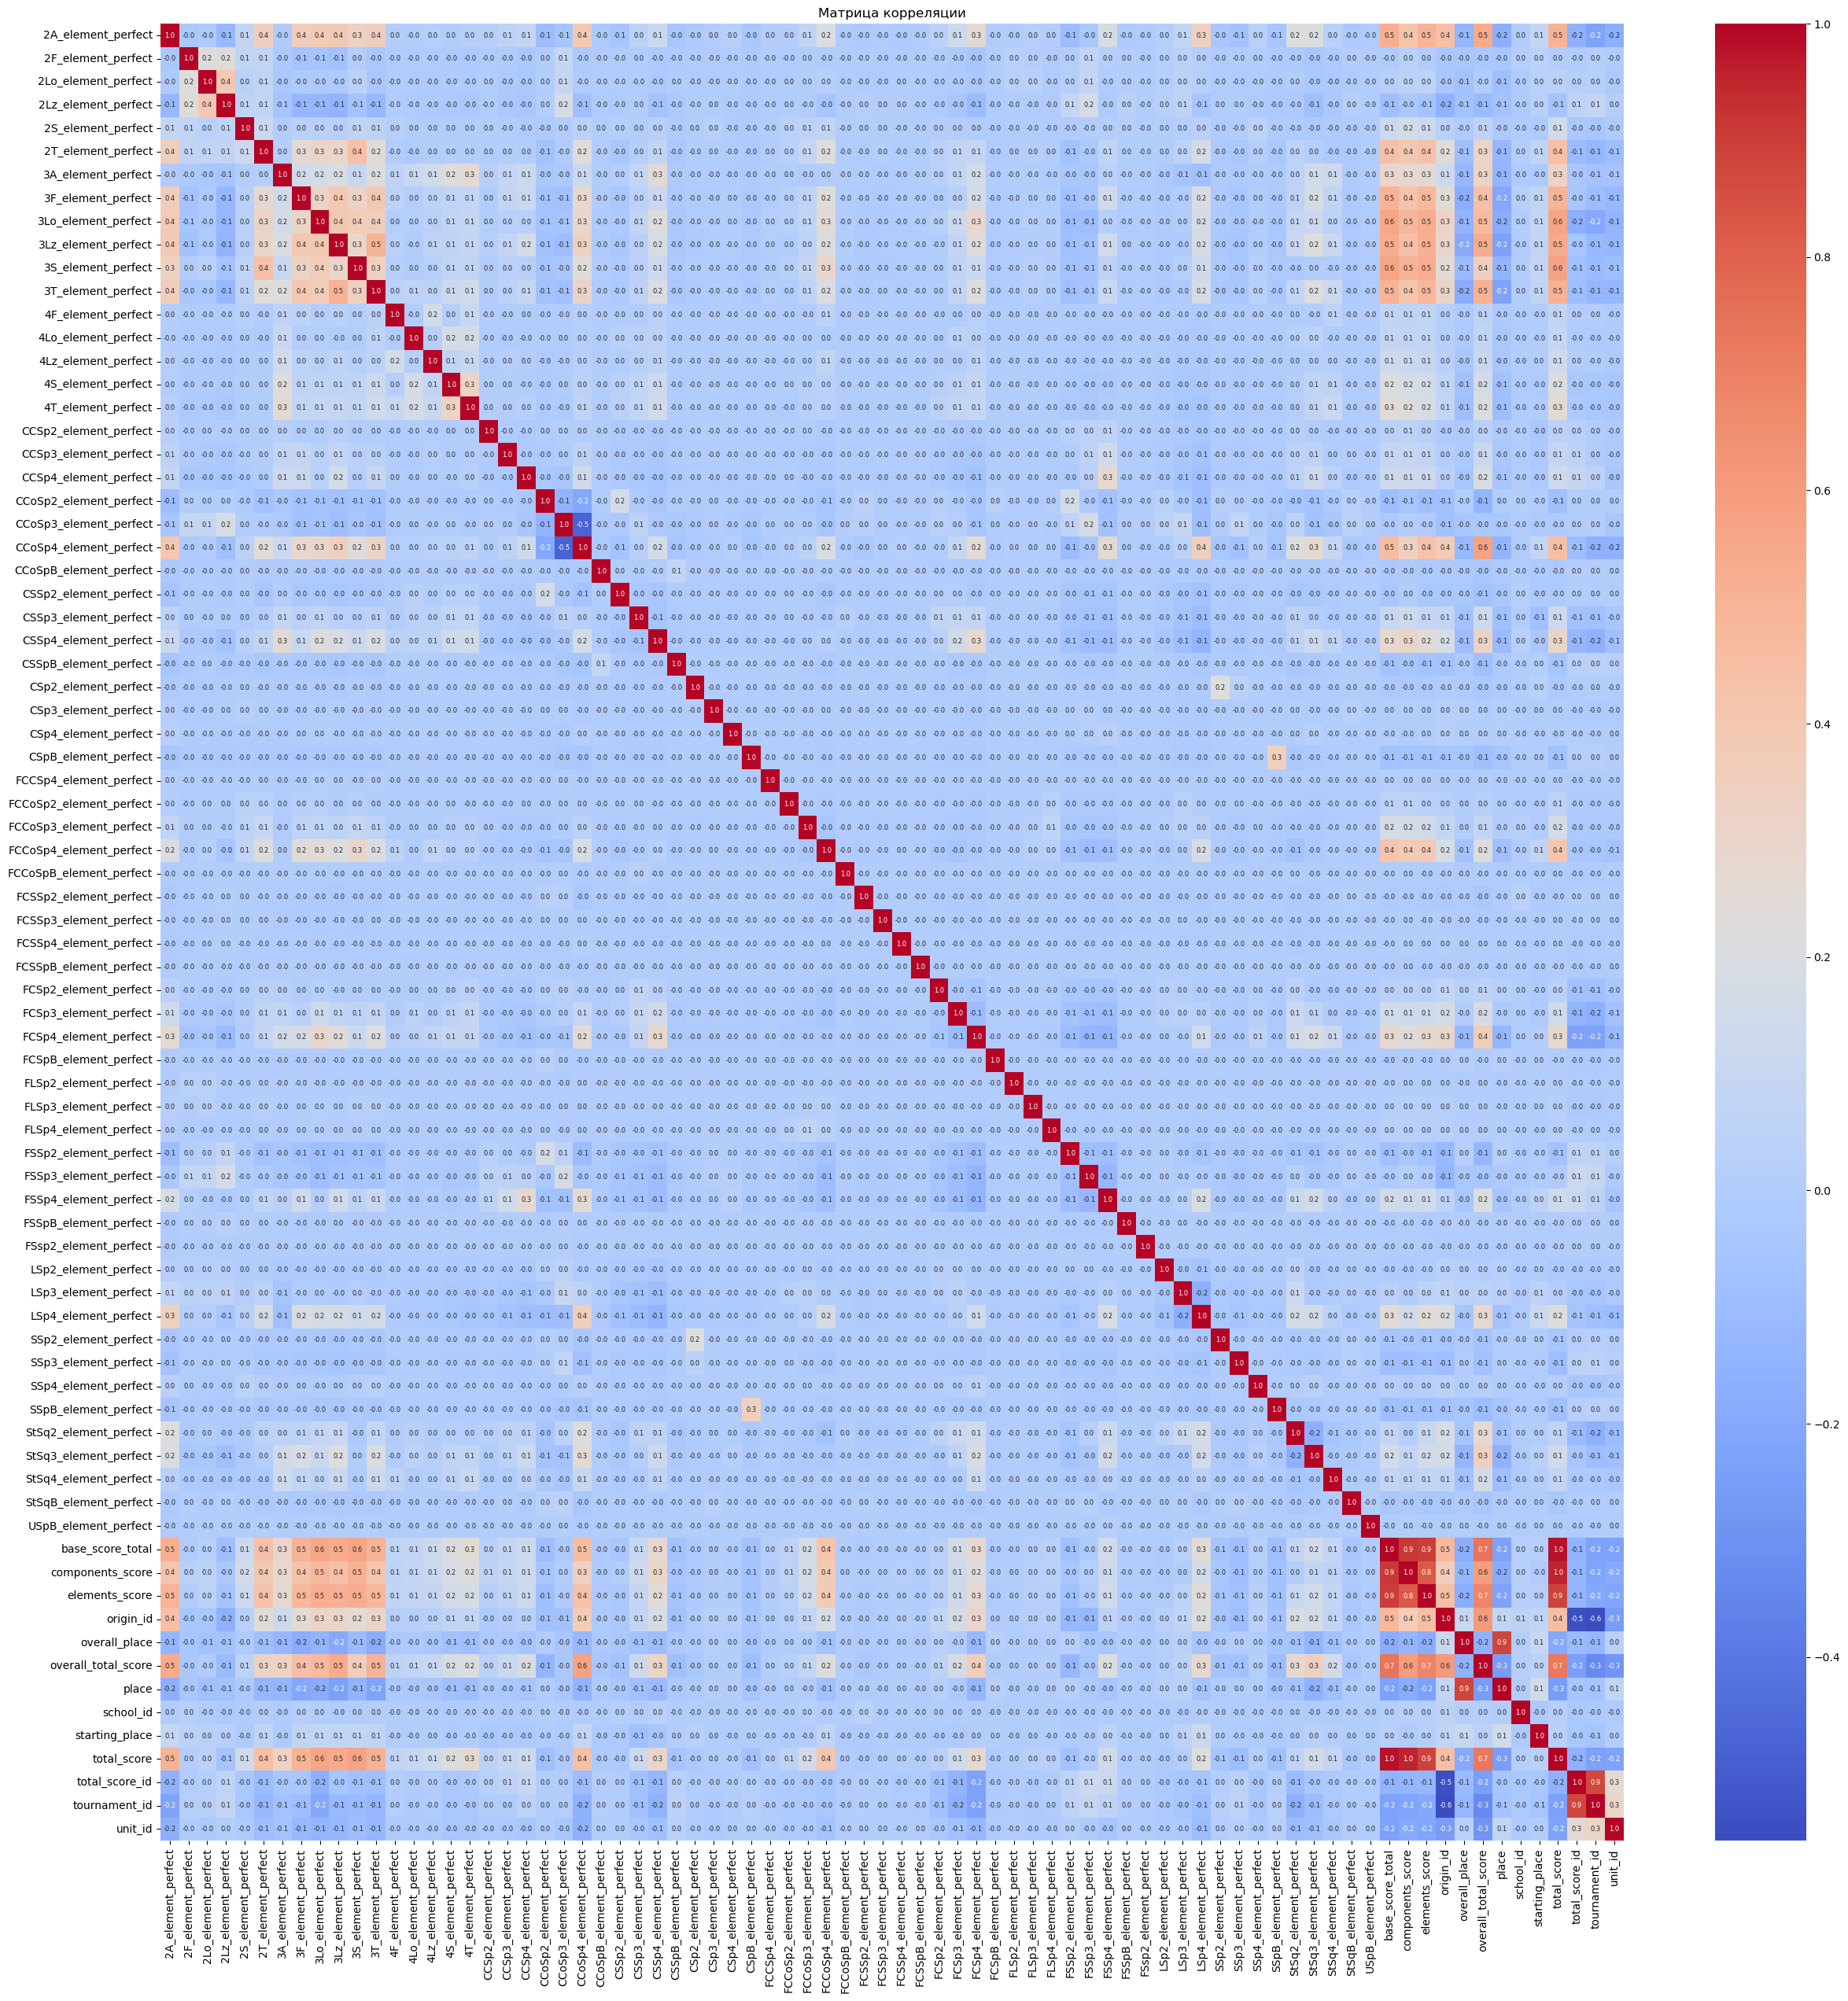

In [52]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_grouped3.corr(), annot=True, fmt=".1f", cmap='coolwarm', annot_kws={'size': 6})
plt.title('Матрица корреляции')
plt.show()

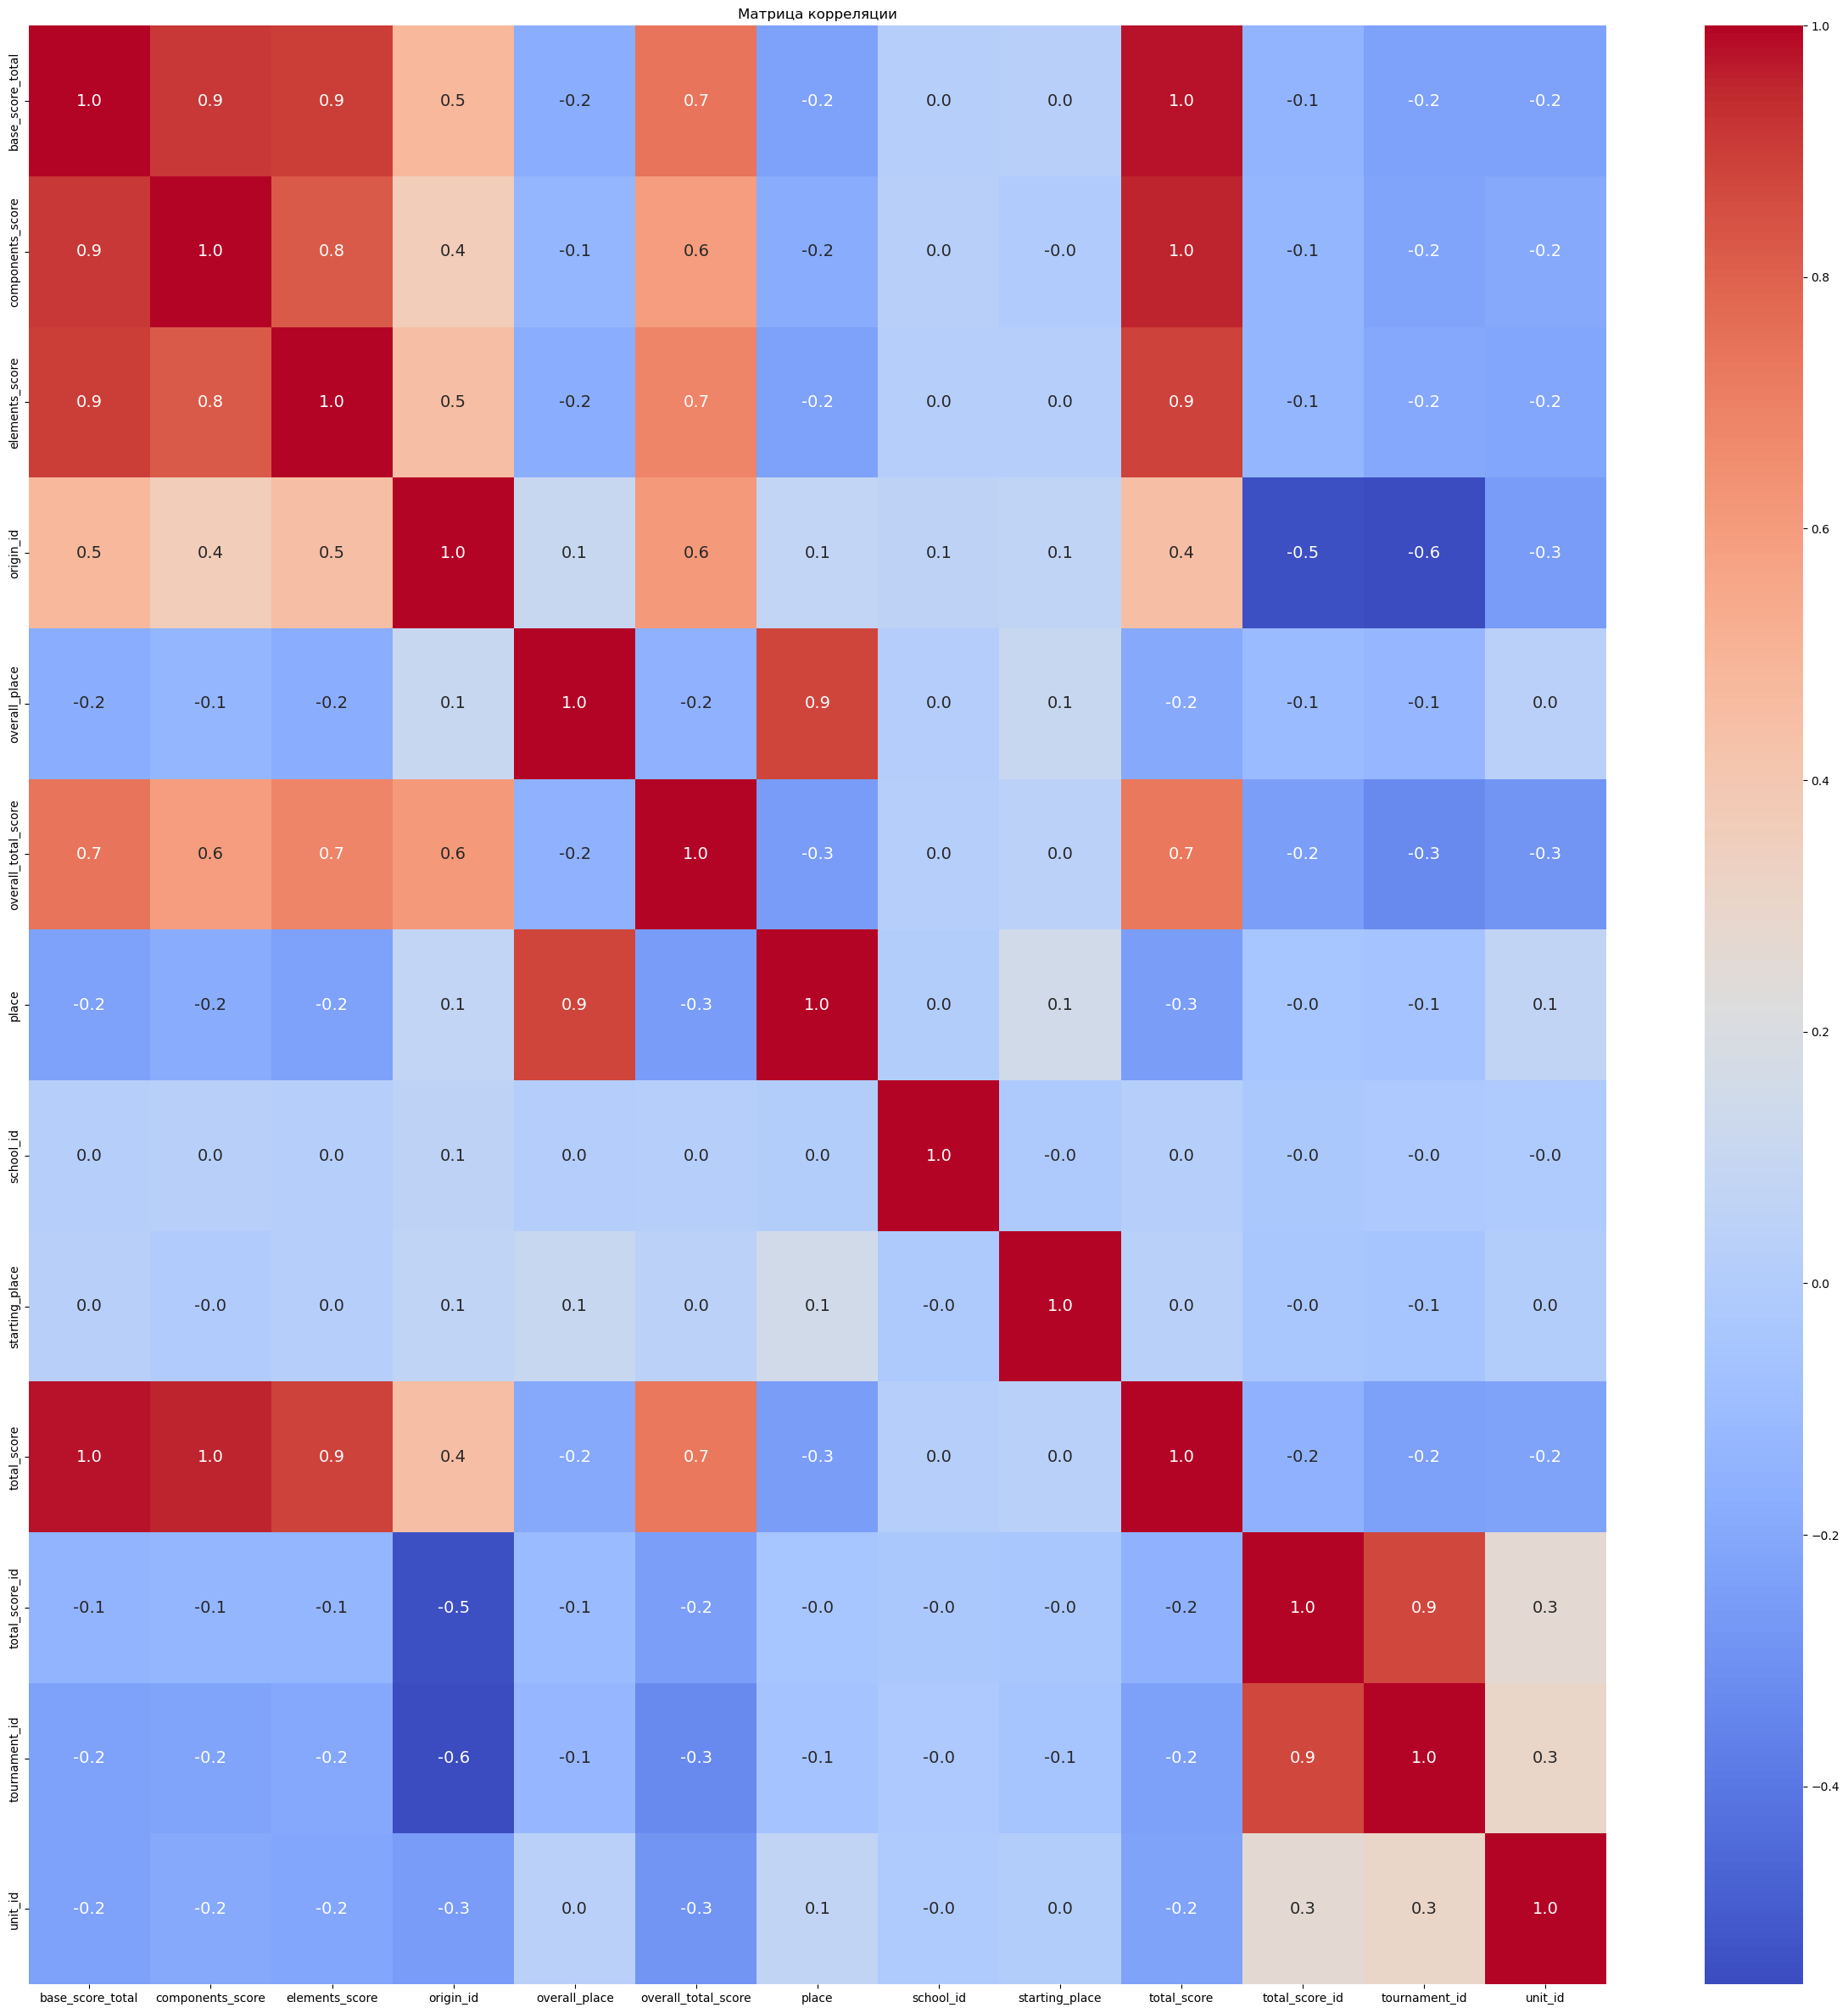

In [53]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_grouped3.drop([col for col in df_grouped3.columns if col.endswith('_element_perfect')],axis = 1).corr(),
            annot=True, fmt=".1f", cmap='coolwarm', annot_kws={'size': 14})
plt.title('Матрица корреляции')
plt.show()

Видим мультиколлинеарность между:

- `total_score` и `base_score_total`, `components_score`, `elements_score` > 0.9
- `total_score_id` и `tornament_id`> 0.9
- `base_score_total` и `components_score`, `elements_score`> 0.9
- `overal_place` и `place`> 0.9

**Можем удалить total_score_id, total_score, overal_place, base_score_total**

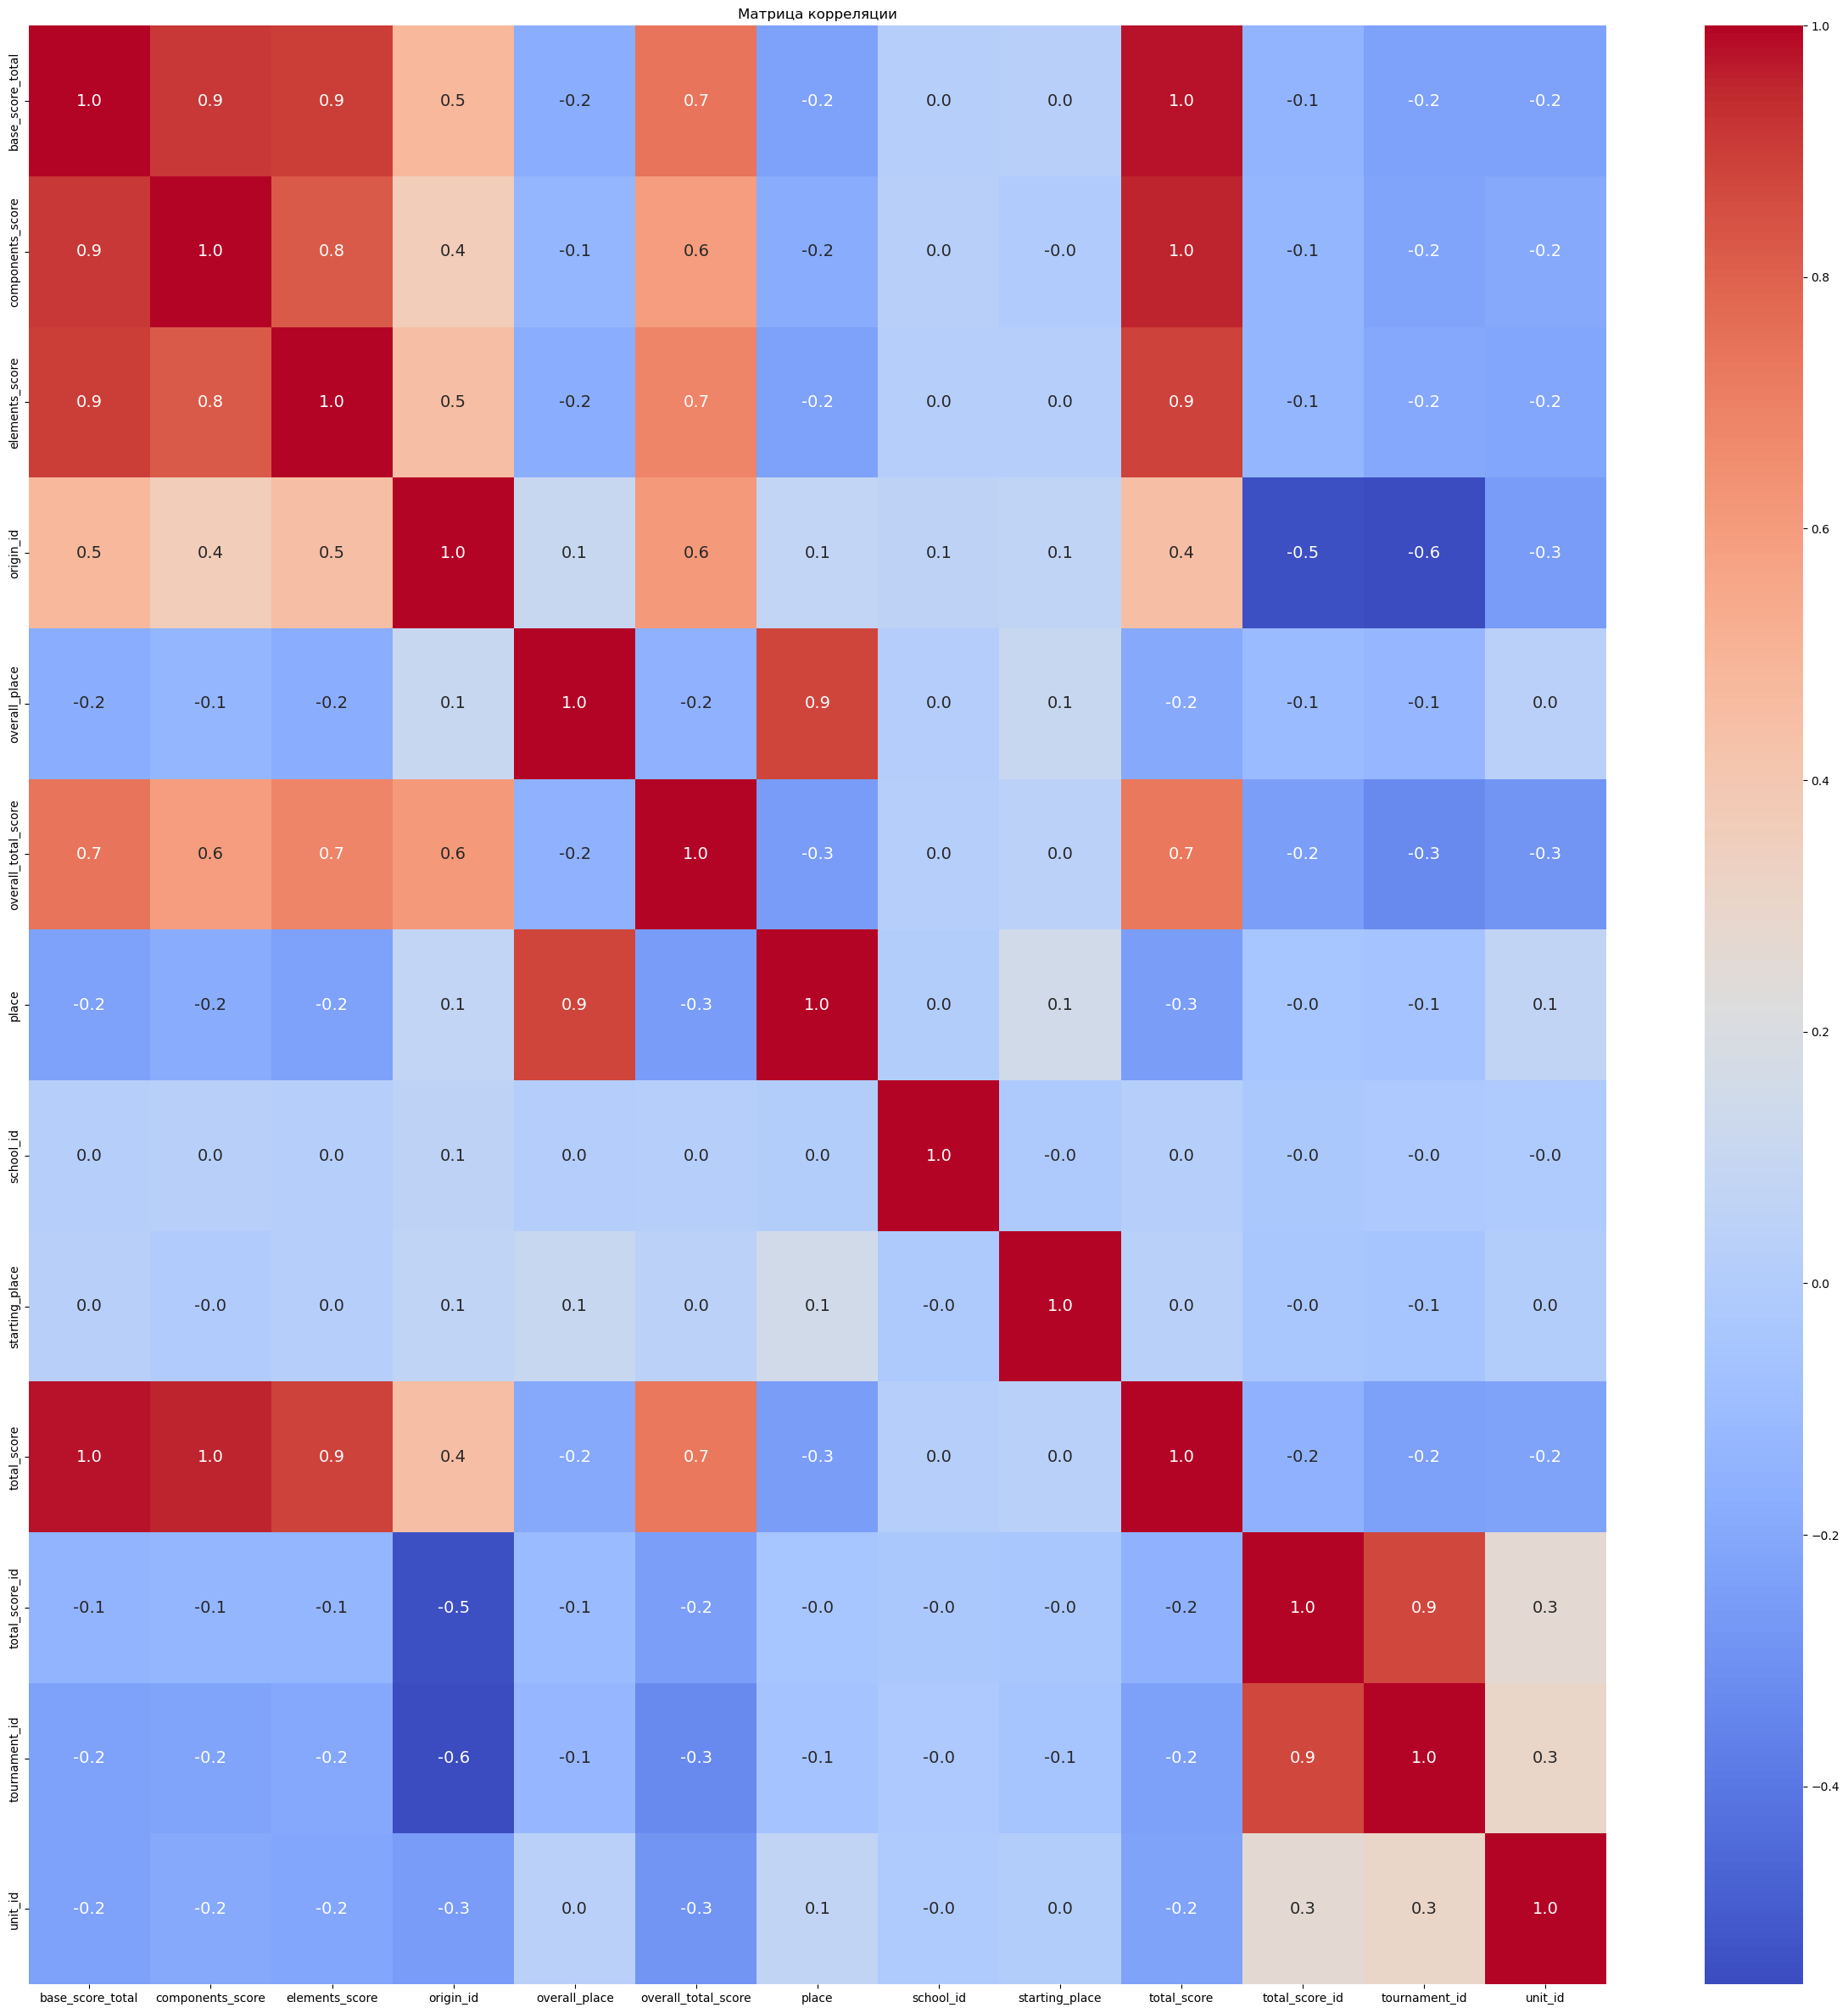

In [54]:
#df_grouped3 = df_grouped3.drop(['total_score_id','total_score_id','total_score','base_score_total'],axis = 1)
plt.figure(figsize=(30, 30))
sns.heatmap(df_grouped3.drop([col for col in df_grouped3.columns if col.endswith('_element_perfect')],axis = 1).corr(),
            annot=True, fmt=".1f", cmap='coolwarm', annot_kws={'size': 14})
plt.title('Матрица корреляции')
plt.show()

**Вывод:**

Видим мультиколлинеарность между:

- `total_score` и `base_score_total`, `components_score`, `elements_score` > 0.9
- `total_score_id` и `tornament_id`> 0.9
- `base_score_total` и `components_score`, `elements_score`> 0.9
- `overal_place` и `place`> 0.9

**Удалили total_score_id, total_score, overal_place, base_score_total**

In [55]:
df_grouped = df_grouped.drop(['total_score_id','total_score_id','total_score','base_score_total'],axis = 1)

# Модель мультиклассификации

**Сделаем модель мультиклассификации. Предсказываем лучшие элементы для последнего выступления**
особенности:
- У некоторых юнитов недостаточно значений для предсказаний, тк мы отсортировали по времени. Во избежании ошибок, желательно использовать предсказании по последнему. Тк при большой тестовой выборке возможен дисбаланс классов, поэтому признак удалится. Модель служит дополнением к рекомендационной


Отсортируем значения по количеству соревнований у каждого человека и удалим все что меньше 4 

In [56]:
df_grouped2 = df_grouped.copy()
df_grouped2 = df_grouped2.drop('title',axis = 1)
def remove_units(df):
    unit_counts = df['unit_id'].value_counts()
    units_to_remove = unit_counts[unit_counts <= 3].index
    mask = ~df['unit_id'].isin(units_to_remove)
    filtered_df = df[mask]
    return filtered_df
df_grouped2 = remove_units(df_grouped2).sort_values(by='date_start')
df_grouped2.head()

,2A_element_perfect,2F_element_perfect,2Lo_element_perfect,2Lz_element_perfect,2S_element_perfect,2T_element_perfect,3A_element_perfect,3F_element_perfect,3Lo_element_perfect,3Lz_element_perfect,3S_element_perfect,3T_element_perfect,4F_element_perfect,4Lo_element_perfect,4Lz_element_perfect,4S_element_perfect,4T_element_perfect,CCSp2_element_perfect,CCSp3_element_perfect,CCSp4_element_perfect,CCoSp2_element_perfect,CCoSp3_element_perfect,CCoSp4_element_perfect,CCoSpB_element_perfect,CSSp2_element_perfect,CSSp3_element_perfect,CSSp4_element_perfect,CSSpB_element_perfect,CSp2_element_perfect,CSp3_element_perfect,CSp4_element_perfect,CSpB_element_perfect,FCCSp4_element_perfect,FCCoSp2_element_perfect,FCCoSp3_element_perfect,FCCoSp4_element_perfect,FCCoSpB_element_perfect,FCSSp2_element_perfect,FCSSp3_element_perfect,FCSSp4_element_perfect,FCSSpB_element_perfect,FCSp2_element_perfect,FCSp3_element_perfect,FCSp4_element_perfect,FCSpB_element_perfect,FLSp2_element_perfect,FLSp3_element_perfect,FLSp4_element_perfect,FSSp2_element_perfect,FSSp3_element_perfect,FSSp4_element_perfect,FSSpB_element_perfect,FSsp2_element_perfect,LSp2_element_perfect,LSp3_element_perfect,LSp4_element_perfect,SSp2_element_perfect,SSp3_element_perfect,SSp4_element_perfect,SSpB_element_perfect,StSq2_element_perfect,StSq3_element_perfect,StSq4_element_perfect,StSqB_element_perfect,USpB_element_perfect,color,components_score,date_end,date_start,elements_score,origin_id,overall_place,overall_total_score,place,school_id,segment_name,starting_place,tournament_id,unit_id,season
12082,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,lime,69.34,2089-09-23,2089-09-20,57.59,1.0,5,189.90,5,62,Произвольная программа,1,94,2451,Autumn
11756,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,lime,34.92,2089-09-23,2089-09-20,39.82,1.0,4,209.41,5,198,Короткая программа,18,95,332,Autumn
11755,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,lime,38.67,2089-09-23,2089-09-20,45.26,1.0,6,197.68,2,198,Короткая программа,6,95,421,Autumn
11754,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,green,37.61,2089-09-23,2089-09-20,30.63,1.0,25,106.75,25,198,Произвольная программа,1,95,369,Autumn
11753,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,green,45.86,2089-09-23,2089-09-20,32.26,1.0,24,126.93,24,198,Произвольная программа,10,95,387,Autumn


In [57]:
RANDOM_STATE = 42
def model__(df_grouped2,unit,n):
    # Предсказание вероятностей
    probabilities = []
    binary = []
    real = []
    df_grouped2 = df_grouped2.query('unit_id == @unit').sort_values('date_start')
    
    train_data = df_grouped2.iloc[:-n]
    last_performances = df_grouped2.iloc[-n:]

    cols_to_check = [col for col in df_grouped2.columns if col.endswith('_element_perfect')]
    y_train = train_data[cols_to_check] 
    X_train = train_data.drop(cols_to_check + ['date_start', 'date_end'], axis=1)

    y_test = last_performances[cols_to_check]
    X_test = last_performances.drop(cols_to_check + ['date_start', 'date_end'], axis=1)
    
    # Вывод реальных значений для сравнения
    for index, row in y_test.iterrows():
        for col in y_test.columns:
            if row[col] == 1:
                real.append(col.replace('_element_perfect', ''))
    real = sorted(set(real))
    
    # Проверка, что в каждом столбце y_train есть как минимум два класса
    cols_to_keep = []  
    for col in y_train.columns:
        if y_train[col].nunique() >= 2:  
            cols_to_keep.append(col)
    # Оставляем только столбцы с как минимум двумя классами
    y_train = y_train[cols_to_keep]
    y_test = y_test[cols_to_keep]
    
    # Масштабирование числовых признаков
    scaler = MinMaxScaler()
    num_columns = X_train.select_dtypes(['int', 'float']).columns.tolist()
    X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
    X_test[num_columns] = scaler.transform(X_test[num_columns])
    
    # One-Hot Encoding для категориальных признаков
    ohe_columns = X_train.select_dtypes('object').columns.tolist()
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    ohe.fit(X_train[ohe_columns])
    ohe_train = ohe.transform(X_train[ohe_columns])
    ohe_test = ohe.transform(X_test[ohe_columns])
    ohe_feature_names = ohe.get_feature_names_out(ohe_columns)
    X_train_ohe = pd.DataFrame(ohe_train, index=X_train.index, columns=ohe_feature_names)
    X_test_ohe = pd.DataFrame(ohe_test, index=X_test.index, columns=ohe_feature_names)
    X_train = pd.concat([X_train.drop(ohe_columns, axis=1), X_train_ohe], axis=1)
    X_test = pd.concat([X_test.drop(ohe_columns, axis=1), X_test_ohe], axis=1)
    
    # Обучение модели
    model = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=RANDOM_STATE))
    model.fit(X_train, y_train)
    # Предсказание
    predictions = model.predict(X_test)
    predictions_df = pd.DataFrame(predictions, index=X_test.index, columns=y_test.columns)
    
    for estimator, col in zip(model.estimators_, y_train.columns):
        proba = estimator.predict_proba(X_test) 
        probabilities.append(pd.DataFrame(proba[:, 1], index=X_test.index, columns=[col]))
    probabilities_df = pd.concat(probabilities, axis=1)
    
    # Преобразование вероятностей в бинарные предсказания (порог 0.3)
    binary_predictions = (probabilities_df >= 0.3).astype(int)
    
    # Вывод бинарных предсказаний
    for index, row in binary_predictions.iterrows():
        for col in binary_predictions.columns:
            if row[col] == 1:
                binary.append(col.replace('_element_perfect', ''))
    binary = sorted(set(binary))
    
    accuracies = []
    for col in y_test.columns:
        accuracy = accuracy_score(y_test[col], binary_predictions[col])
        accuracies.append(accuracy)
    
    # Усредняем точность по всем столбцам
    average_accuracy = sum(accuracies) / len(accuracies)
    print("Средняя точность по всем элементам:", average_accuracy)
    # Вычисляем confusion matrix для каждого столбца
    confusion_matrices = multilabel_confusion_matrix(y_test, binary_predictions)
    
    # Суммируем confusion matrices для всех столбцов
    total_cm = np.sum(confusion_matrices, axis=0)
    # Визуализация общей матрицы ошибок
    plt.figure(figsize=(6, 5))
    sns.heatmap(total_cm, annot=True, fmt='d', cmap='coolwarm', 
                xticklabels=['0', '1'], 
                yticklabels=['0', '1'])
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Реальные значения')
    plt.title('Общая матрица ошибок')
    plt.show()
    return real,binary

Ниже сделаем список индексов unit'ов чтобы после можно было ввести любой из них и предсказать значения

In [58]:
unit_ids = sorted(list(df_grouped2['unit_id'].unique()))[:5]

# Выводим значения в одну строку через запятую
print(", ".join(map(str, unit_ids)))

1, 3, 4, 5, 6


Выбираем последние N соревнований и номер unit'а

Средняя точность по всем элементам: 0.7142857142857143


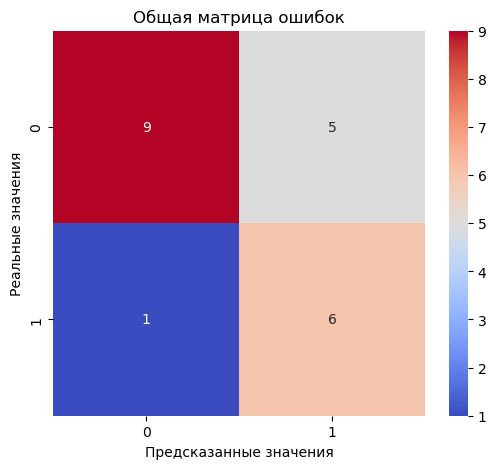

Реальные значения: ['2A', '2T', '3Lz', 'CCoSp4', 'FCSp3', 'LSp4', 'StSq3']
Бинарные предсказания: ['2A', '3F', '3Lz', 'CCoSp3', 'CCoSp4', 'FCSp3', 'FCSp4', 'LSp3', 'LSp4', 'StSq2', 'StSq3']


In [59]:
real, binary = model__(df_grouped2,1,1)
print("Реальные значения:", real)
print("Бинарные предсказания:", binary)

**Описание модели мультиклассификации для прогнозирования лучших элементов**

*Цель модели:*

Модель предназначена для прогнозирования лучших элементов для спортсменов на основе их предыдущих выступлений. Модель анализирует исторические данные и предсказывает, какие элементы будут наиболее успешными в последних N выступлениях конкретного спортсмена.

**Как работает модель:**
    
1. **Выбор спортсмена:**
    - Вам предоставляется список всех unit_id спортсменов. Вы можете выбрать любого спортсмена, для которого хотите получить прогноз.
2. **Прогнозирование для последних N выступлений:**
    - Модель анализирует данные последних N выступлений выбранного спортсмена.
    - На основе этих данных она предсказывает, какие элементы будут наиболее успешными.
3. **Результаты:**
    - Модель возвращает два набора данных(Каждый выводится единым списком за N дней):
        - Реальные значения: Фактические элементы, которые спортсмен выполнил в последних N выступлениях. 
        - Прогнозируемые значения: Элементы, которые модель рекомендует как наиболее успешные.

# Рекомендационная модель

Смотрим похожесть по элементам и из этого делаем рекомендации

In [60]:
df_grouped.head()

,2A_element_perfect,2F_element_perfect,2Lo_element_perfect,2Lz_element_perfect,2S_element_perfect,2T_element_perfect,3A_element_perfect,3F_element_perfect,3Lo_element_perfect,3Lz_element_perfect,3S_element_perfect,3T_element_perfect,4F_element_perfect,4Lo_element_perfect,4Lz_element_perfect,4S_element_perfect,4T_element_perfect,CCSp2_element_perfect,CCSp3_element_perfect,CCSp4_element_perfect,CCoSp2_element_perfect,CCoSp3_element_perfect,CCoSp4_element_perfect,CCoSpB_element_perfect,CSSp2_element_perfect,CSSp3_element_perfect,CSSp4_element_perfect,CSSpB_element_perfect,CSp2_element_perfect,CSp3_element_perfect,CSp4_element_perfect,CSpB_element_perfect,FCCSp4_element_perfect,FCCoSp2_element_perfect,FCCoSp3_element_perfect,FCCoSp4_element_perfect,FCCoSpB_element_perfect,FCSSp2_element_perfect,FCSSp3_element_perfect,FCSSp4_element_perfect,FCSSpB_element_perfect,FCSp2_element_perfect,FCSp3_element_perfect,FCSp4_element_perfect,FCSpB_element_perfect,FLSp2_element_perfect,FLSp3_element_perfect,FLSp4_element_perfect,FSSp2_element_perfect,FSSp3_element_perfect,FSSp4_element_perfect,FSSpB_element_perfect,FSsp2_element_perfect,LSp2_element_perfect,LSp3_element_perfect,LSp4_element_perfect,SSp2_element_perfect,SSp3_element_perfect,SSp4_element_perfect,SSpB_element_perfect,StSq2_element_perfect,StSq3_element_perfect,StSq4_element_perfect,StSqB_element_perfect,USpB_element_perfect,color,components_score,date_end,date_start,elements_score,origin_id,overall_place,overall_total_score,place,school_id,segment_name,starting_place,title,tournament_id,unit_id,season
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,green,24.67,2090-12-01,2090-11-29,33.19,2.0,4,164.44,5,198,Короткая программа,2,2A/3F+3Lo/3Lz/CCoSp4/FCSp4/LSp4/StSq2,1,1,Autumn
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,green,49.40,2090-12-01,2090-11-29,58.18,2.0,4,164.44,4,198,Произвольная программа,2,2A/3F/3Fq+3Loq/3Lz<+1Eu+2F/3Lzq+2T/3S/CCoSp4/ChSq1/FCSp4/LSp4/StSq2,1,1,Autumn
2,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,green,28.66,2090-12-01,2090-11-29,38.69,2.0,1,201.45,1,251,Короткая программа,4,2A/3Lo/3Lz+3T/CCoSp4/FCSp4/LSp4/StSq3,1,1426,Autumn
3,1,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,green,60.07,2090-12-01,2090-11-29,74.03,2.0,1,201.45,1,251,Произвольная программа,6,2A/2A+3T/3F/3Lo/3Lo+2T/3Lz/3Lz+1Eu+3S/CCoSp4/ChSq1/FCCoSp4/LSp4/StSq3,1,1426,Autumn
4,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,green,25.87,2090-12-01,2090-11-29,34.88,2.0,5,161.10,3,75,Короткая программа,1,2A/3F/3Lz+3Lo/CCoSp3/FSSp4/LSp4/StSq3,1,3,Autumn


In [61]:
elements_col = [col for col in df_grouped.columns if col.endswith('_element_perfect')]
elements = df_grouped.groupby('unit_id')[elements_col].sum().map(lambda x: 1 if x != 0 else 0)

new_columns = [col.replace('_element_perfect', '') if col.endswith('_element_perfect') else col for col in elements.columns]
elements.columns = new_columns

elements.head()

,2A,2F,2Lo,2Lz,2S,2T,3A,3F,3Lo,3Lz,3S,3T,4F,4Lo,4Lz,4S,4T,CCSp2,CCSp3,CCSp4,CCoSp2,CCoSp3,CCoSp4,CCoSpB,CSSp2,CSSp3,CSSp4,CSSpB,CSp2,CSp3,CSp4,CSpB,FCCSp4,FCCoSp2,FCCoSp3,FCCoSp4,FCCoSpB,FCSSp2,FCSSp3,FCSSp4,FCSSpB,FCSp2,FCSp3,FCSp4,FCSpB,FLSp2,FLSp3,FLSp4,FSSp2,FSSp3,FSSp4,FSSpB,FSsp2,LSp2,LSp3,LSp4,SSp2,SSp3,SSp4,SSpB,StSq2,StSq3,StSq4,StSqB,USpB
unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0
3,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0
4,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1,0,1,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0
6,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0


In [62]:
def recommendation(df, unit, n):
    # Вычисляем матрицу косинусной схожести
    similarity_matrix = cosine_similarity(df)
    
    # Находим индекс юнита
    indx = df.index.get_loc(unit)
    
    # Лучшие элементы текущего юнита
    unit_elements = df.iloc[indx]
    best_elements = unit_elements[unit_elements > 0].index.tolist()
    
    # Находим похожих юнитов (исключаем самого себя)
    similar_units = np.argsort(-similarity_matrix[indx])[1:]  # argsort возвращает индексы
    
    # Собираем элементы похожих юнитов
    new_elements = []
    for unit_idx in similar_units:
        similar_unit_elements = df.iloc[unit_idx]
        new_elements.extend(similar_unit_elements[similar_unit_elements > 0].index.tolist())
    
    # Убираем дубликаты и элементы, которые уже есть у текущего юнита
    unique_new_elements = list(set(new_elements))  # Убираем дубликаты
    recommended_elements = [el for el in unique_new_elements if el not in best_elements][:n]
    
    # Возвращаем похожих юнитов (их unit_id) и рекомендованные элементы
    similar_unit_ids = df.index[similar_units].tolist()[:n] 
    return similar_unit_ids, recommended_elements

similar_units, recommended_elements = recommendation(elements, 1, 5)
print("Похожие юниты:", similar_units)
print("Рекомендованные элементы:", recommended_elements)

Похожие юниты: [392, 551, 351, 602, 361]
Рекомендованные элементы: ['4Lz', 'FCSSp3', 'FCSSp4', 'FSsp2', 'CCSp2']


**Описание рекомендационной модели для прогнозирования лучших элементов**

*Цель модели:*

Рекомендационная модель предназначена для предоставления персонализированных рекомендаций спортсменам на основе их текущих навыков и схожести с другими спортсменами. Модель анализирует данные о выполненных элементах и рекомендует новые элементы, которые могут быть успешно освоены, основываясь на опыте похожих спортсменов.

**Как работает модель:**

1) **Выбор спортсмена:**

Вам предоставляется список всех unit_id спортсменов. Вы можете выбрать любого спортсмена, для которого хотите получить рекомендации.

2) **Анализ текущих навыков и предсказания**

Модель анализирует элементы, которые выбранный спортсмен уже успешно выполняет (например, элементы с положительными значениями в данных). Модель вычисляет схожесть между выбранным спортсменом и всеми остальными спортсменами на основе их выполнения элементов. Для этого используется косинусная схожесть. Наиболее похожие спортсмены определяются как те, у которых схожесть с выбранным спортсменом максимальна.

4) **Рекомендация новых элементов:**

Модель возвращает список элементов, которые могут быть успешно освоены выбранным спортсменом, основываясь на опыте похожих спортсменов.

5) **Результаты:**

Модель возвращает два набора данных:

- Похожие спортсмены:

    - Список unit_id спортсменов, которые наиболее схожи с выбранным спортсменом по выполнению элементов.

- Рекомендованные элементы:

    - Список элементов, которые похожие спортсмены успешно выполняют, но которые ещё не освоены выбранным спортсменом. Эти элементы рекомендуются для освоения.

## Лучшие элементы

Самые высокие оценки за элемент у unit'а

In [63]:
elements_reset = elements.reset_index()
# Преобразуем таблицу с помощью melt
melted_df = elements_reset.melt(id_vars=['unit_id'], var_name='elements', value_name='value')
# Фильтруем строки, где value == 1
filtered_df = melted_df[melted_df['value'] == 1]

filtered_df = filtered_df.drop(columns=['value']).sort_values('unit_id')
filtered_df.head()

,unit_id,elements
0,1,2A
167640,1,LSp4
3048,1,2F
164592,1,LSp3
152400,1,FSSp4


In [64]:
unit_score = filtered_df.merge(scores[['element','base']],
                               left_on = 'elements', right_on = 'element').drop('elements',axis =1)
unit_score.head()

,unit_id,element,base
0,1,2A,3.3
1,1,LSp4,2.7
2,1,2F,1.8
3,1,LSp3,2.4
4,1,FSSp4,3.0


In [65]:
max_id = unit_score.groupby('unit_id')['base'].idxmax()
unit_score.iloc[max_id].head()

,unit_id,element,base
17,1,3Lz,5.9
23,3,3Lz,5.9
38,4,3Lo,4.9
55,5,3Lz,5.9
62,6,3Lz,5.9


Функция выводит лучший элемент у unit'a

In [66]:
def best_el(unit):
    elements_reset = elements[elements.index == unit]
    elements_reset = elements_reset.reset_index()
    # Преобразуем таблицу с помощью melt
    melted_df = elements_reset.melt(id_vars=['unit_id'], var_name='elements', value_name='value')
    # Фильтруем строки, где value == 1
    filtered_df = melted_df[melted_df['value'] == 1]
    
    filtered_df = filtered_df.drop(columns=['value']).sort_values('unit_id')
    unit_score = filtered_df.merge(scores[['element','base']],
                               left_on = 'elements', right_on = 'element').drop('elements',axis =1)
    max_id = unit_score.groupby('unit_id')['base'].idxmax()
    return unit_score.iloc[max_id]
best = best_el(118)
best

,unit_id,element,base
0,118,2A,3.3


# Итоговая функция 

In [67]:
df_grouped2 = df_grouped.copy()
df_grouped2 = df_grouped2.drop('title',axis = 1)
def remove_units(df):
    unit_counts = df['unit_id'].value_counts()
    units_to_remove = unit_counts[unit_counts <= 3].index
    mask = ~df['unit_id'].isin(units_to_remove)
    filtered_df = df[mask]
    return filtered_df
df_grouped2 = remove_units(df_grouped2).sort_values(by='date_start')

RANDOM_STATE = 42
def model__(df_grouped2,unit,n):
    # Предсказание вероятностей
    probabilities = []
    binary = []
    real = []
    df_grouped2 = df_grouped2.query('unit_id == @unit').sort_values('date_start')
    
    train_data = df_grouped2.iloc[:-n] 
    last_performances = df_grouped2.iloc[-n:]
    
    cols_to_check = [col for col in df_grouped2.columns if col.endswith('_element_perfect')]
    y_train = train_data[cols_to_check] 
    X_train = train_data.drop(cols_to_check + ['date_start', 'date_end'], axis=1)

    y_test = last_performances[cols_to_check]
    X_test = last_performances.drop(cols_to_check + ['date_start', 'date_end'], axis=1)
    # Вывод реальных значений для сравнения
    for index, row in y_test.iterrows():
        for col in y_test.columns:
            if row[col] == 1:
                real.append(col.replace('_element_perfect', ''))
    real = sorted(set(real))
    # Проверка, что в каждом столбце y_train есть как минимум два класса
    cols_to_keep = []  
    for col in y_train.columns:
        if y_train[col].nunique() >= 2:  
            cols_to_keep.append(col)
    # Оставляем только столбцы с как минимум двумя классами
    y_train = y_train[cols_to_keep]
    y_test = y_test[cols_to_keep]
    
    # Масштабирование числовых признаков
    scaler = MinMaxScaler()
    num_columns = X_train.select_dtypes(['int', 'float']).columns.tolist()
    X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
    X_test[num_columns] = scaler.transform(X_test[num_columns])
    
    # One-Hot Encoding для категориальных признаков
    ohe_columns = X_train.select_dtypes('object').columns.tolist()
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    ohe.fit(X_train[ohe_columns])
    ohe_train = ohe.transform(X_train[ohe_columns])
    ohe_test = ohe.transform(X_test[ohe_columns])
    ohe_feature_names = ohe.get_feature_names_out(ohe_columns)
    X_train_ohe = pd.DataFrame(ohe_train, index=X_train.index, columns=ohe_feature_names)
    X_test_ohe = pd.DataFrame(ohe_test, index=X_test.index, columns=ohe_feature_names)
    X_train = pd.concat([X_train.drop(ohe_columns, axis=1), X_train_ohe], axis=1)
    X_test = pd.concat([X_test.drop(ohe_columns, axis=1), X_test_ohe], axis=1)
    
    # Обучение модели
    model = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=RANDOM_STATE))
    model.fit(X_train, y_train)
    
    # Предсказание
    predictions = model.predict(X_test)
    predictions_df = pd.DataFrame(predictions, index=X_test.index, columns=y_test.columns)
    
    
    for estimator, col in zip(model.estimators_, y_train.columns):
        proba = estimator.predict_proba(X_test) 
        probabilities.append(pd.DataFrame(proba[:, 1], index=X_test.index, columns=[col]))
    probabilities_df = pd.concat(probabilities, axis=1)
    
    # Преобразование вероятностей в бинарные предсказания (порог 0.3)
    binary_predictions = (probabilities_df >= 0.25).astype(int)
    
    # Вывод бинарных предсказаний
    for index, row in binary_predictions.iterrows():
        for col in binary_predictions.columns:
            if row[col] == 1:
                binary.append(col.replace('_element_perfect', ''))
    binary = sorted(set(binary))
    return real,binary

elements_col = [col for col in df_grouped.columns if col.endswith('_element_perfect')]
elements = df_grouped.groupby('unit_id')[elements_col].sum().map(lambda x: 1 if x != 0 else 0)

new_columns = [col.replace('_element_perfect', '') if col.endswith('_element_perfect') else col for col in elements.columns]
elements.columns = new_columns
def recommendation(df, unit, n):
    # Вычисляем матрицу косинусной схожести
    similarity_matrix = cosine_similarity(df)
    
    # Находим индекс юнита
    indx = df.index.get_loc(unit)
    
    # Лучшие элементы текущего юнита
    unit_elements = df.iloc[indx]
    best_elements = unit_elements[unit_elements > 0].index.tolist()
    
    # Находим похожих юнитов (исключаем самого себя)
    similar_units = np.argsort(-similarity_matrix[indx])[1:]  # argsort возвращает индексы
    
    # Собираем элементы похожих юнитов
    new_elements = []
    for unit_idx in similar_units:
        similar_unit_elements = df.iloc[unit_idx]
        new_elements.extend(similar_unit_elements[similar_unit_elements > 0].index.tolist())
    
    # Убираем дубликаты и элементы, которые уже есть у текущего юнита
    unique_new_elements = list(set(new_elements))  # Убираем дубликаты
    recommended_elements = [el for el in unique_new_elements if el not in best_elements][:n]
    
    # Возвращаем похожих юнитов (их unit_id) и рекомендованные элементы
    similar_unit_ids = df.index[similar_units].tolist()[:n] 
    return similar_unit_ids, recommended_elements

def best_el(unit):
    elements_reset = elements[elements.index == unit]
    elements_reset = elements_reset.reset_index()
    # Преобразуем таблицу с помощью melt
    melted_df = elements_reset.melt(id_vars=['unit_id'], var_name='elements', value_name='value')
    # Фильтруем строки, где value == 1
    filtered_df = melted_df[melted_df['value'] == 1]
    
    filtered_df = filtered_df.drop(columns=['value']).sort_values('unit_id')
    unit_score = filtered_df.merge(scores[['element','base']],
                               left_on = 'elements', right_on = 'element').drop('elements',axis =1)
    max_id = unit_score.groupby('unit_id')['base'].idxmax()
    return unit_score.iloc[max_id]

unit = int(input())
n_last = int(input())
n_elements = int(input())

real, binary = model__(df_grouped2,unit,n_last)
print("Реальные значения:", real)
print("Бинарные предсказания:", binary)

similar_units, recommended_elements = recommendation(elements, unit, n_elements)
print("Похожие юниты:", similar_units)
print("Рекомендованные элементы:", recommended_elements)

best = best_el(unit)
display("Лучший элемент:", best)

 1
 1
 1


Реальные значения: ['2A', '2T', '3Lz', 'CCoSp4', 'FCSp3', 'LSp4', 'StSq3']
Бинарные предсказания: ['2A', '3F', '3Lz', 'CCoSp3', 'CCoSp4', 'FCSp3', 'FCSp4', 'LSp3', 'LSp4', 'StSq2', 'StSq3']
Похожие юниты: [392]
Рекомендованные элементы: ['4Lz']


'Лучший элемент:'

,unit_id,element,base
11,1,3Lz,5.9


# Вывод

1. **Загрузка данных**

- Ярких выбросов не видно, есть типы данных, которые можно изменить.

2. **Предобработка данных**

- Изменили тип данных в  `school_id` на int
- нет полных дубликатов
- Видим очень много повторов в `segment_name`, почистили их
- Столбец decrease решила полностью взять из инфо
  
4. **Исследовательский анализ данных**
   
- Есть небольшие выбросы, но не стали их удалять, тк такие оценки вполне возможны
- Удалили все ненужные и перегруженные столбцы
- Соединили значения в `goe` и  в `title` - два самых важных признака
- Нашли медиану по которой будем смотреть насколько хорошо спорсмен выполнил элемент.Считаем >= 0.21 как идеально, меньше как ошибку
- Сделали красивый df, распарсив элементы
- Удалили `W_element_perfect`(Лишний элемент все занчения =0) и `goe` (больше нам не нужен, поскольку содержиться в колонках)
- Сделали столбец по сезону игр
- Проверили и удалили строки с только 1 значением, т.к.это не информационные для нас значения
  
5. **Корреляционный анализ данных**

Видим мультиколлинеарность между:

- `total_score` и `base_score_total`, `components_score`, `elements_score` > 0.9
- `total_score_id` и `tornament_id`> 0.9
- `base_score_total` и `components_score`, `elements_score`> 0.9
- `overal_place` и `place`> 0.9

*Удалили total_score_id, total_score, overal_place, base_score_total*

6. **Модель мультиклассификации**

Сначала отсортирвоали значения по количеству соревнований у каждого человека и удалим все что меньше 4.

*Описание модели мультиклассификации для прогнозирования лучших элементов*

*Цель модели:*

Модель предназначена для прогнозирования лучших элементов для спортсменов на основе их предыдущих выступлений. Модель анализирует исторические данные и предсказывает, какие элементы будут наиболее успешными в последних N выступлениях конкретного спортсмена.

*Как работает модель:*
    
1) *Выбор спортсмена:*
    - Вам предоставляется список всех unit_id спортсменов. Вы можете выбрать любого спортсмена, для которого хотите получить прогноз
2) *Прогнозирование для последних N выступлений:*
    - Модель анализирует данные последних N выступлений выбранного спортсмена.
    - На основе этих данных она предсказывает, какие элементы будут наиболее успешными.
3) *Результаты:*
    - Модель возвращает два набора данных(Каждый выводится единым списком за N дней):
        - Реальные значения: Фактические элементы, которые спортсмен выполнил в последних N выступлениях. 
        - Прогнозируемые значения: Элементы, которые модель рекомендует как наиболее успешные.

Метрики: accuracy_score, multilabel_confusion_matrix

8. **Рекомендательная модель**

*Описание рекомендационной модели для прогнозирования лучших элементов*

*Цель модели:*

Рекомендационная модель предназначена для предоставления персонализированных рекомендаций спортсменам на основе их текущих навыков и схожести с другими спортсменами. Модель анализирует данные о выполненных элементах и рекомендует новые элементы, которые могут быть успешно освоены, основываясь на опыте похожих спортсменов.

*Как работает модель:*

1) *Выбор спортсмена:*

Вам предоставляется список всех unit_id спортсменов. Вы можете выбрать любого спортсмена, для которого хотите получить рекомендации.

2) *Анализ текущих навыков и предсказания*

Модель анализирует элементы, которые выбранный спортсмен уже успешно выполняет (например, элементы с положительными значениями в данных). Модель вычисляет схожесть между выбранным спортсменом и всеми остальными спортсменами на основе их выполнения элементов. Для этого используется косинусная схожесть. Наиболее похожие спортсмены определяются как те, у которых схожесть с выбранным спортсменом максимальна.

4) *Рекомендация новых элементов:*

Модель возвращает список элементов, которые могут быть успешно освоены выбранным спортсменом, основываясь на опыте похожих спортсменов.

5) *Результаты:*

Модель возвращает два набора данных:

- Похожие спортсмены:

    - Список unit_id спортсменов, которые наиболее схожи с выбранным спортсменом по выполнению элементов.

- Рекомендованные элементы:

    - Список элементов, которые похожие спортсмены успешно выполняют, но которые ещё не освоены выбранным спортсменом. Эти элементы рекомендуются для освоения.

8. **Лучшие элементы**

Функция выводит лучший элемент у unit'a

Пример:

|unit_id	 | element | base
|---|---|---|
| 118 | 2A | 3.3 |


# Чекбокс DS

- [X] Объединить данные – спортсмены, юниты, соревнования, сегменты, школы, тренеры
- [X] Провести анализ данных, изучить аномалии, корреляции, описать наблюдения и сделать выводы
- [X] Выделить все элементы фигурного катания, представленых в виде объединенной строки с набором элементов например 2F!<<+2Lo<<CCoSp2V* Актуальный список элементов можно посмотреть здесь https://eislauf-union.de/files/users/997/Elemente-Liste2023_24.pdf вам нужна будет только категория Single skating, а также специальные отметки Special codes в конце документа
- [X] Выделить элементы успешно выполненные и с погрешностями (имеют специальные пометки)
- [X] Агрегировать датасет и подготовить обучающие признаки
- [X] Создать модель для предсказания вероятности успешного выполнения элементов
- [X] Проанализировать признаки, выявить ошибки и слабые стороны модели, улучшить решение
- [X] Создать функцию (класс) для применения в сервисе возможность регулировки длины истории спортсмена для построения прогноза, например использовать последние N соревнований (выбор модели или запуск обучения)
- [X] Протестировать решение  